In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, accuracy_score, plot_precision_recall_curve, plot_roc_curve
import scipy, joblib

In [2]:
df = pd.read_csv('water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
df.shape

(3276, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
df.isnull().sum() / len(df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []

## Exploratory Data Analysis

## Univariate Analysis

ph
Skewness: 0.04021515847826108
Kurtosis: 0.08649031171330535


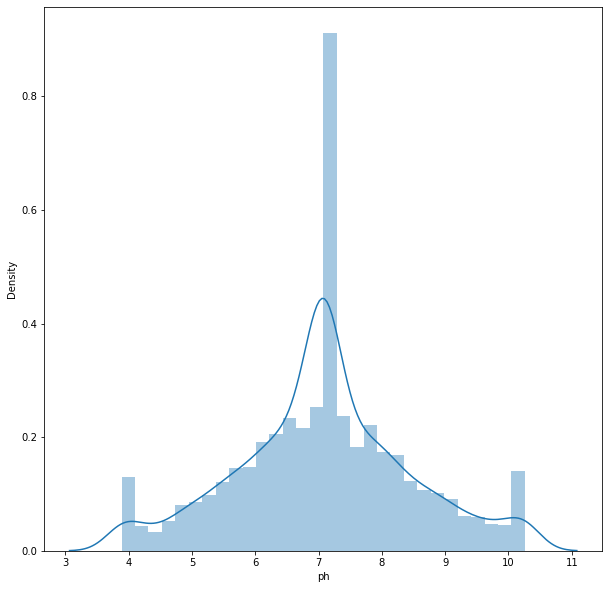

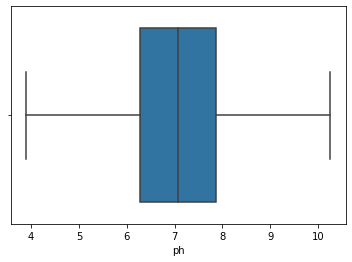

Hardness
Skewness: -0.024976969626310422
Kurtosis: 0.046959620389384504


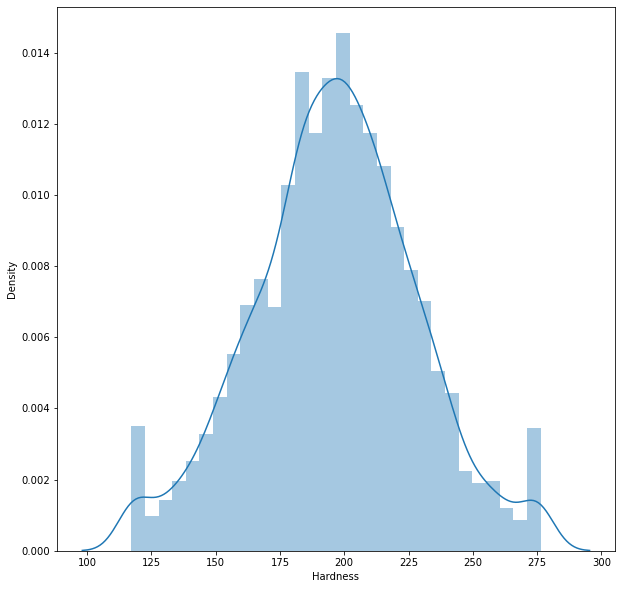

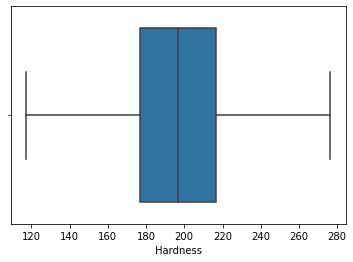

Solids
Skewness: 0.4845658510677537
Kurtosis: -0.09535563974531547


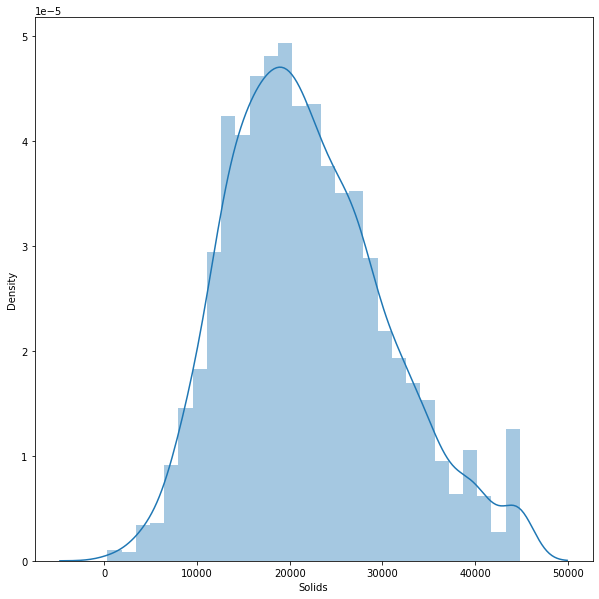

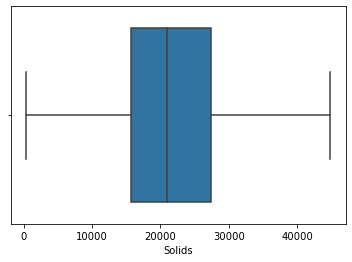

Chloramines
Skewness: -0.017865040278755337
Kurtosis: 0.0032652874381273733


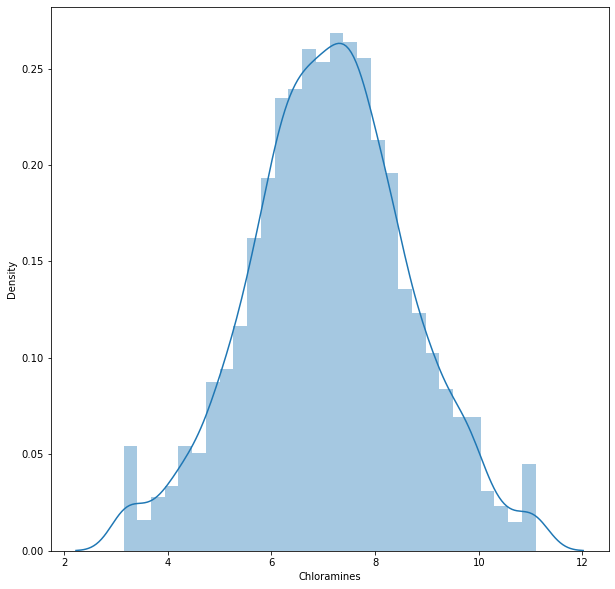

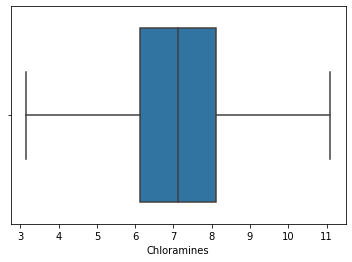

Sulfate
Skewness: 0.03974334980003228
Kurtosis: -0.04707585348467003


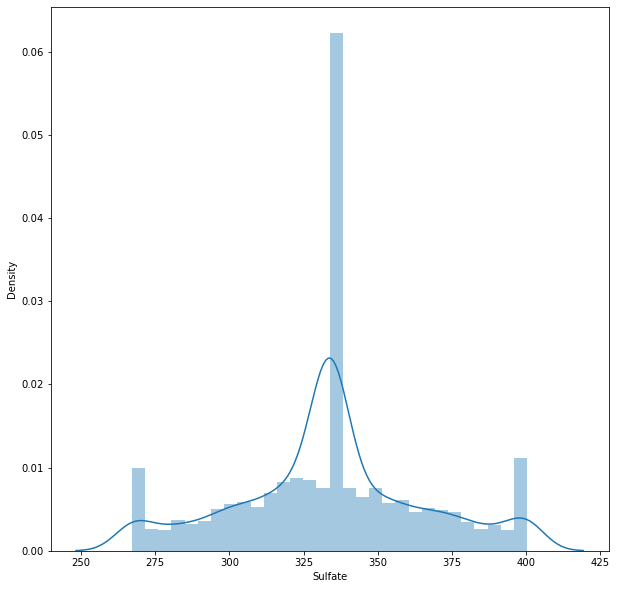

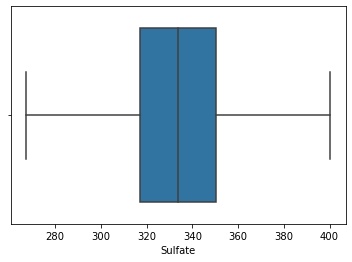

Conductivity
Skewness: 0.2405724991998891
Kurtosis: -0.3773937435768304


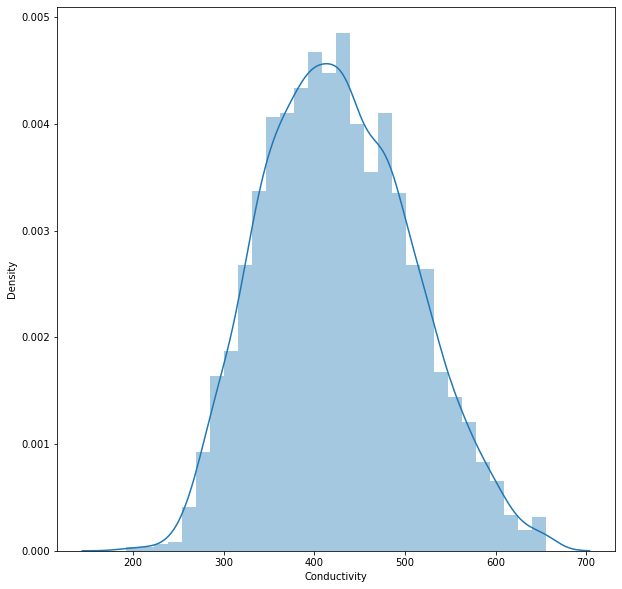

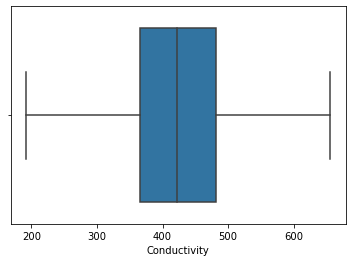

Organic_carbon
Skewness: 0.008748778491116443
Kurtosis: -0.13151431030892136


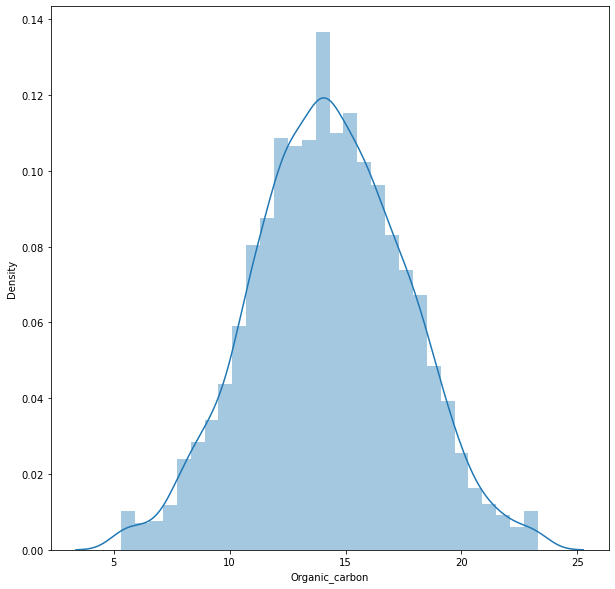

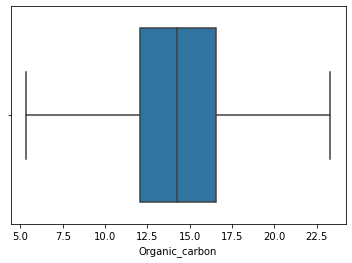

Trihalomethanes
Skewness: -0.04962336911951027
Kurtosis: 0.006946394490656704


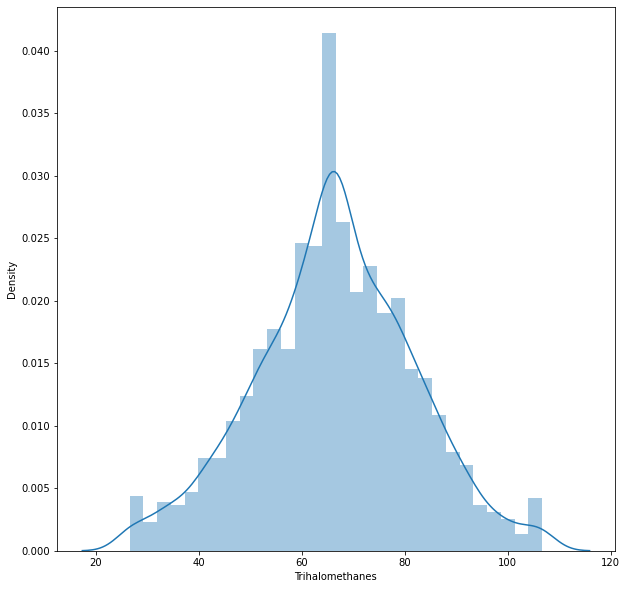

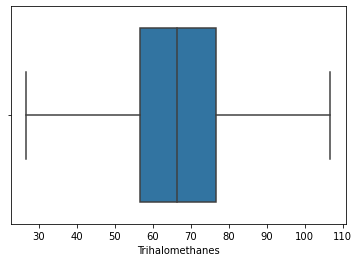

Turbidity
Skewness: -0.014412805111749525
Kurtosis: -0.1837434783774028


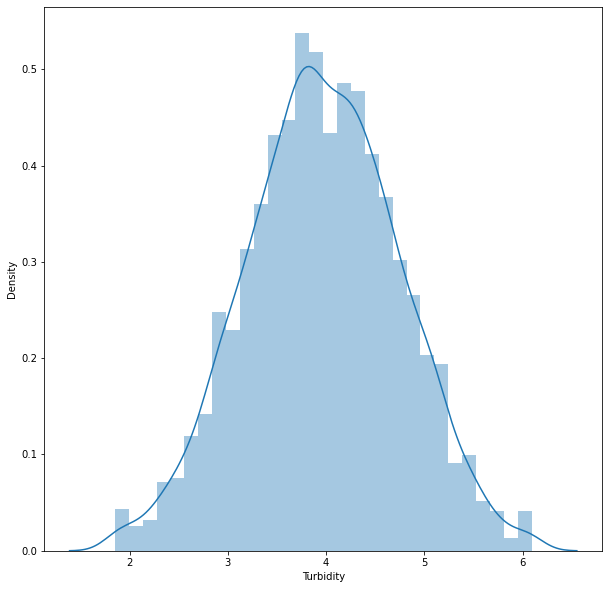

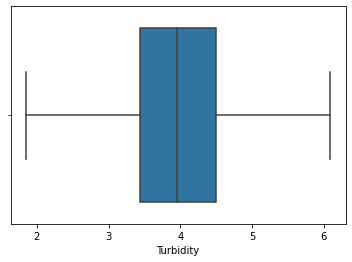

Potability
Skewness: 0.4507837491078628
Kurtosis: -1.7978919987325783


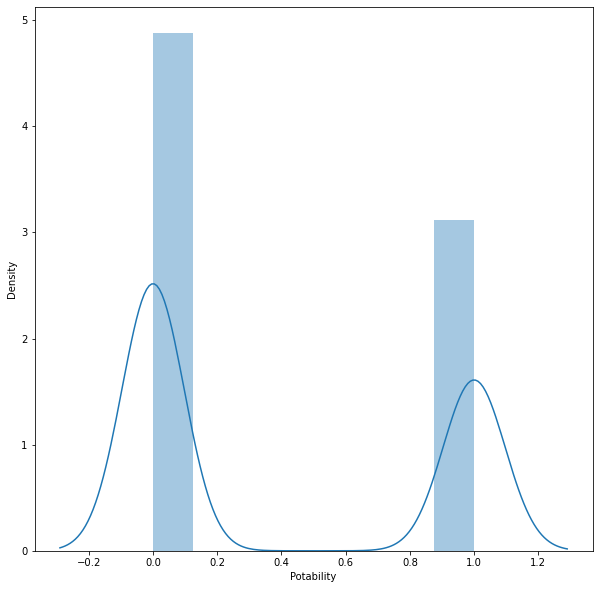

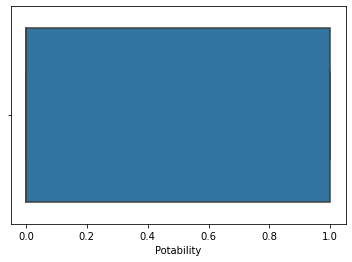

In [84]:
for col in df.columns:
    print(col)
    print("Skewness:",df[col].skew())
    print("Kurtosis:",df[col].kurt())
    plt.figure(figsize=(10,10))
    sns.distplot(df[col])
    plt.show()
    sns.boxplot(df[col])
    plt.show()

The distribution of the features, 'Conductivity' and 'Solids', is considerably skewed. The box plots of each feature indicate the presence of outliers which need to be replaced with some meaningful and acceptable value.

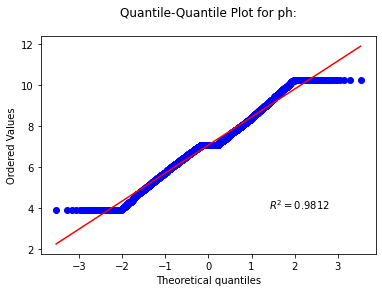

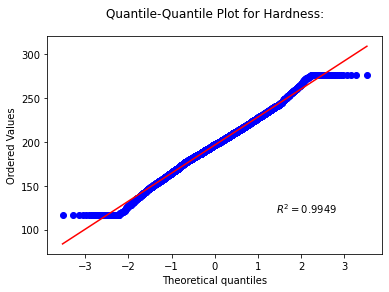

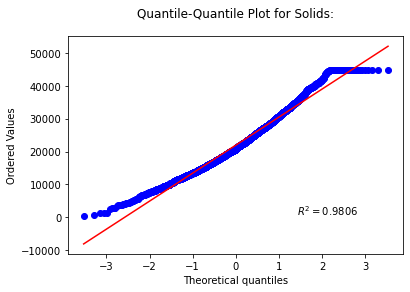

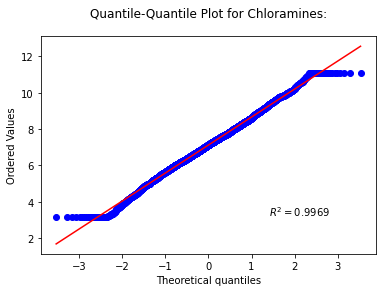

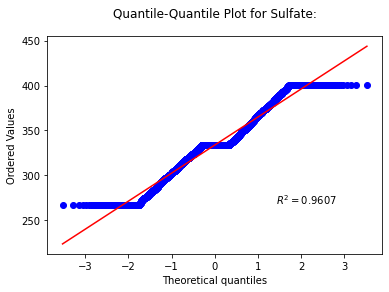

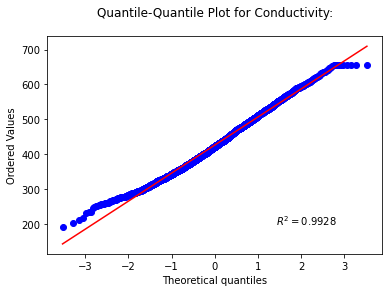

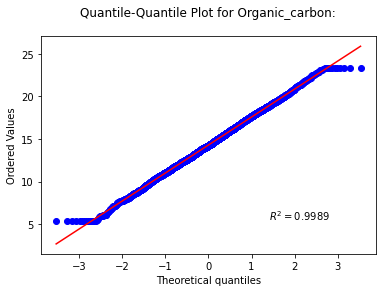

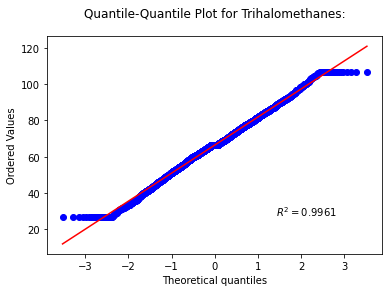

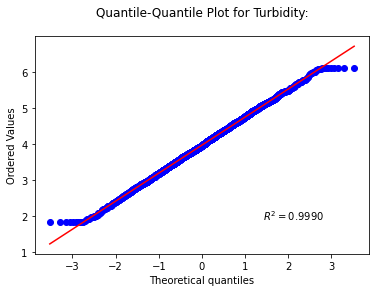

In [105]:
for col in df.columns:
    if col != 'Potability':
        scipy.stats.probplot(df[col],plot=plt,rvalue=True)
        plt.title('Quantile-Quantile Plot for {}:'.format(col),pad=20)
        plt.show()

The distributions of all the features are close to the desired normal distribution.

## Bivariate Analysis

In [87]:
df.corr()['Potability'].sort_values(ascending=False)[1:]

Solids             0.031847
Chloramines        0.023523
Trihalomethanes    0.006893
Turbidity          0.001597
ph                -0.001973
Conductivity      -0.007881
Hardness          -0.013360
Sulfate           -0.015669
Organic_carbon    -0.029282
Name: Potability, dtype: float64

Statistically speaking, all the features are almost independent of the target column 'Potability'.

However, as far as relative correlation analysis is concerned, solids and chloramines are the features which have the highest correlation with the target label i.e. Potability whereas Organic_carbon is the least significantly correlated with Potability.

In [92]:
df.groupby('Potability')[['Solids','Chloramines','Trihalomethanes','ph','Turbidity','Conductivity','Hardness','Sulfate','Organic_carbon']].mean().reset_index()

Potability        Solids  Chloramines  Trihalomethanes        ph  \
0         0.0  21738.283429     7.092748        66.335060  7.082129   
1         1.0  22299.224786     7.167203        66.553887  7.076540   

   Turbidity  Conductivity    Hardness     Sulfate  Organic_carbon  
0   3.965620    426.637682  196.734462  334.186717       14.360461  
1   3.968163    425.336233  195.857685  333.166391       14.163082

In [108]:
pd.pivot_table(df,index='Potability',
               values=['Solids','Chloramines','Trihalomethanes','ph','Turbidity','Conductivity','Hardness','Sulfate','Organic_carbon'],
               aggfunc=[np.mean,np.median]
           )

mean                                                        \
           Chloramines Conductivity    Hardness Organic_carbon        Solids   
Potability                                                                     
0.0           7.092748   426.637682  196.734462      14.360461  21738.283429   
1.0           7.167203   425.336233  195.857685      14.163082  22299.224786   

                                                                median  \
               Sulfate Trihalomethanes Turbidity        ph Chloramines   
Potability                                                               
0.0         334.186717       66.335060  3.965620  7.082129    7.090334   
1.0         333.166391       66.553887  3.968163  7.076540    7.215163   

                                                                              \
           Conductivity    Hardness Organic_carbon        Solids     Sulfate   
Potability                                                                     
0.0          422.229331  197.123423      14.293508  20809.618280  333.775777   
1.0          420.712729  196.632907      14.162809  21199.386614  333.775777   

                                                
           Trihalomethanes Turbidity        ph  
Potability                                      
0.0              66.396293  3.948076  7.080795  
1.0              66.396293  3.958576  7.080795

## Feature Engineering

### Imputation of Missing Values

In [8]:
for col in ['ph','Sulfate','Trihalomethanes']:
    df[col].fillna(df[col].mean(),inplace=True)

In [9]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Outlier Treatment

In [122]:
#Capping
for col in df.columns:
    if col not in ['ph','Potability']:
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]<lower_whisker,lower_whisker,np.where(df[col]>upper_whisker,upper_whisker,df[col]))

<AxesSubplot:xlabel='Potability', ylabel='count'>

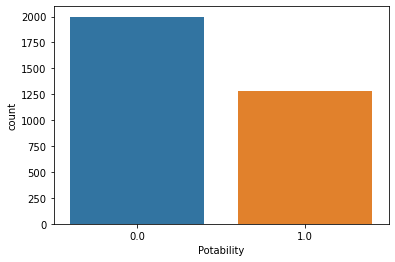

In [123]:
sns.countplot(df.Potability)

The target feature Potability has imbalanced classes with 1.0 i.e. potable water being the majority class and 0.0 i.e. non-potable water being the minority class. The minority class needs to be over-sampled using some over sampling technique which will be done later. 

## Multivariate Analysis

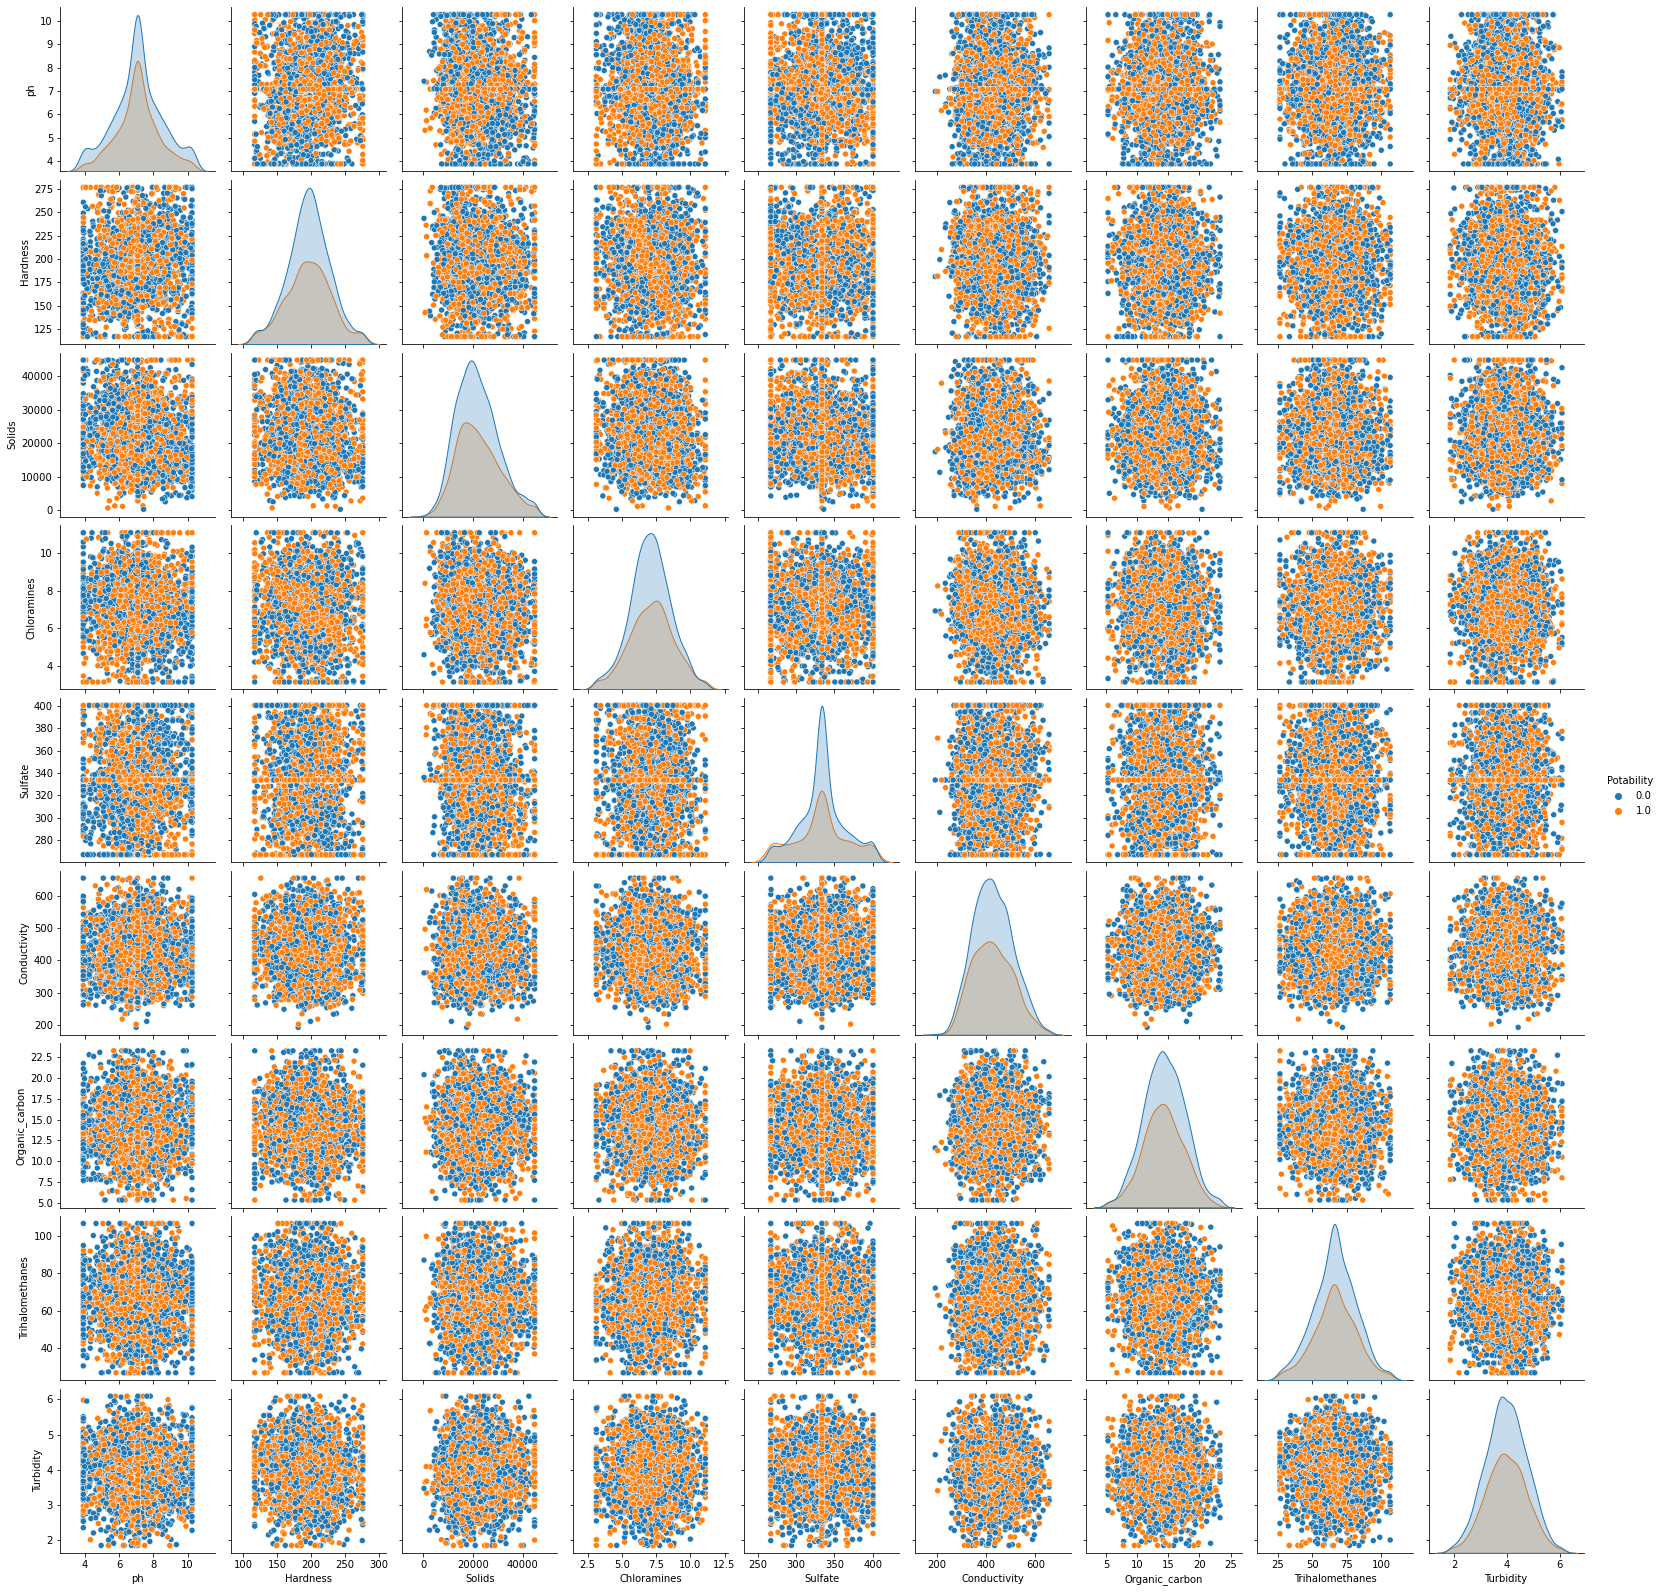

In [12]:
sns.pairplot(df,hue='Potability')

Both potable and non-potable water have almost similar properties and follow Gaussian distribution.

<AxesSubplot:>

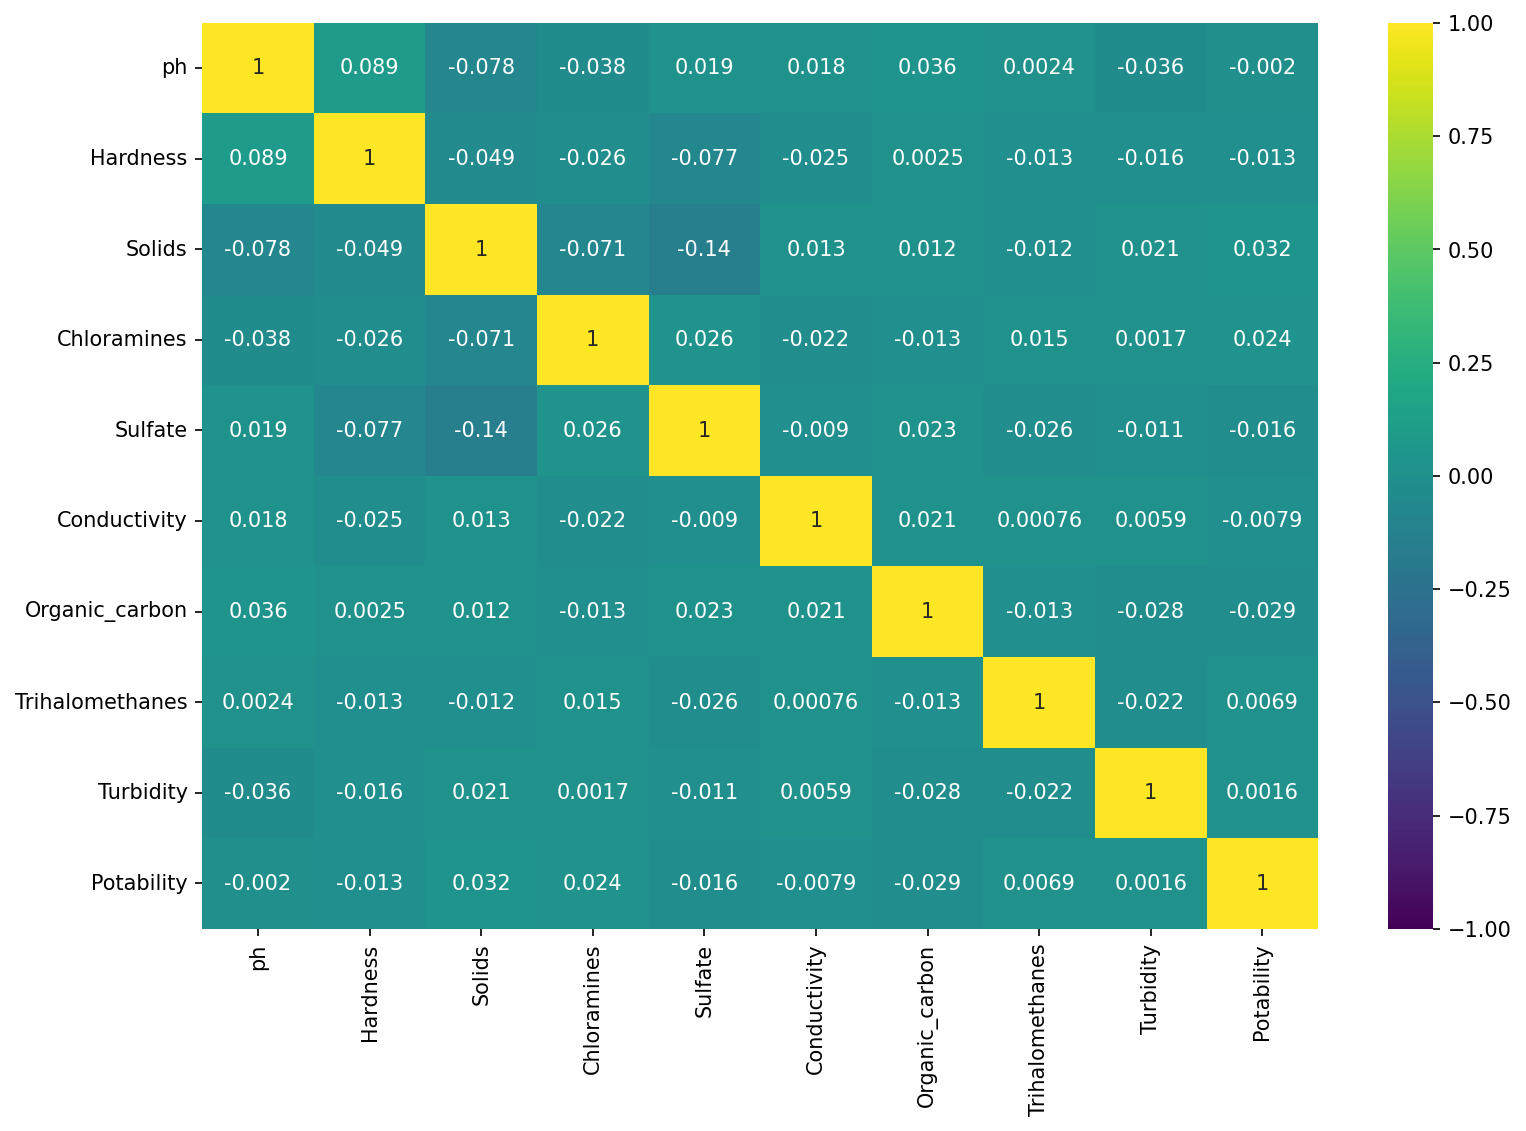

In [13]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

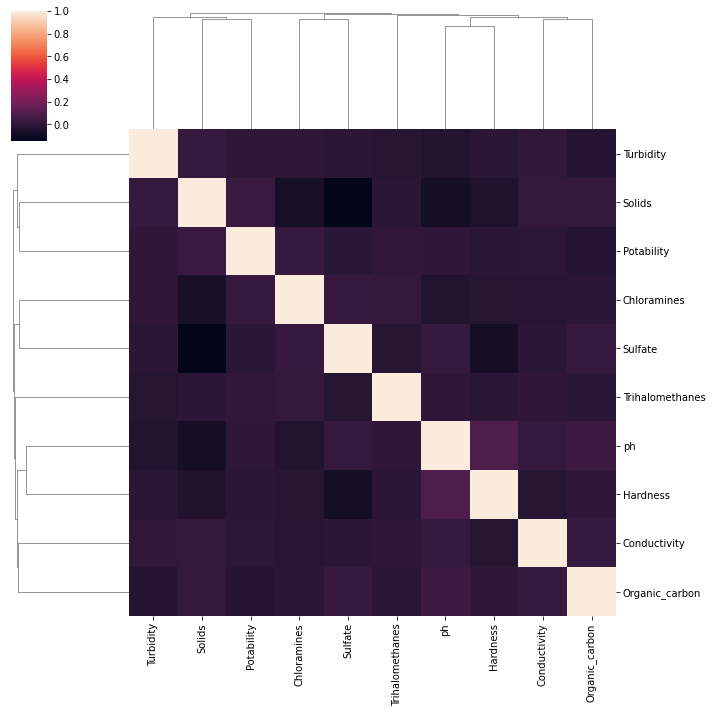

In [78]:
sns.clustermap(df.corr(),)

## Model Training & Evaluation

In [14]:
X = df.drop('Potability',axis=1)
y = df.Potability

## Feature Scaling

In [15]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.000612  0.265461 -0.135691     0.115564  1.093335      1.715401   
1 -2.309292 -2.091993 -0.387249    -0.315144 -0.000406      2.070162   
2  0.737603  0.869786 -0.238325     1.395235 -0.000406     -0.093403   
3  0.895116  0.561689  0.007136     0.607257  0.727178     -0.780410   
4  1.456334 -0.477657 -0.463030    -0.372561 -0.744666     -0.344116   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -1.187299         1.328436  -1.292657  
1        0.272685        -0.651695   0.687944  
2        0.786278        -0.000022  -1.173116  
3        1.263149         2.190618   0.852978  
4       -0.828861        -2.222985   0.139720

## Balancing the target classes

In [16]:
smote = SMOTE()
X, y = smote.fit_resample(X,y)

## Dividing the dataset into training and test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Logistic Regression

In [18]:
base_log_model = LogisticRegression()
base_log_model.fit(X_train,y_train)

LogisticRegression()

In [19]:
lr_pred = base_log_model.predict(X_test)
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.58      0.55       593
         1.0       0.54      0.48      0.51       606

    accuracy                           0.53      1199
   macro avg       0.53      0.53      0.53      1199
weighted avg       0.53      0.53      0.53      1199



### Cross Validation of Logistic Regression model

In [20]:
cv_log_model = pd.DataFrame(cross_validate(base_log_model,X_train,y_train,scoring=['accuracy','precision','recall','f1','roc_auc'],cv=10,verbose=2))
cv_log_model

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1  \
0  0.009249    0.006013       0.485714        0.478632     0.402878  0.437500   
1  0.008580    0.006981       0.478571        0.471545     0.417266  0.442748   
2  0.008470    0.005991       0.535714        0.532847     0.525180  0.528986   
3  0.006907    0.005026       0.492857        0.487603     0.424460  0.453846   
4  0.007178    0.004988       0.525000        0.522388     0.503597  0.512821   
5  0.008329    0.004989       0.521429        0.521739     0.514286  0.517986   
6  0.007815    0.004988       0.510714        0.512821     0.428571  0.466926   
7  0.007282    0.004989       0.516129        0.517241     0.431655  0.470588   
8  0.006557    0.006017       0.523297        0.522727     0.496403  0.509225   
9  0.008219    0.005023       0.530466        0.527778     0.546763  0.537102   

   test_roc_auc  
0      0.512373  
1      0.474718  
2      0.544977  
3      0.455635  
4      0.526762  
5      0.494286  
6      0.523622  
7      0.503340  
8      0.547431  
9      0.536896

In [21]:
cv_log_model.test_accuracy.mean()

0.5119892473118279

### Searching for appropriate value of no. of neighbors for KNN algorithm

In [22]:
scores = []
for i in range(1,21):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train,y_train)
    scores.append(knc.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

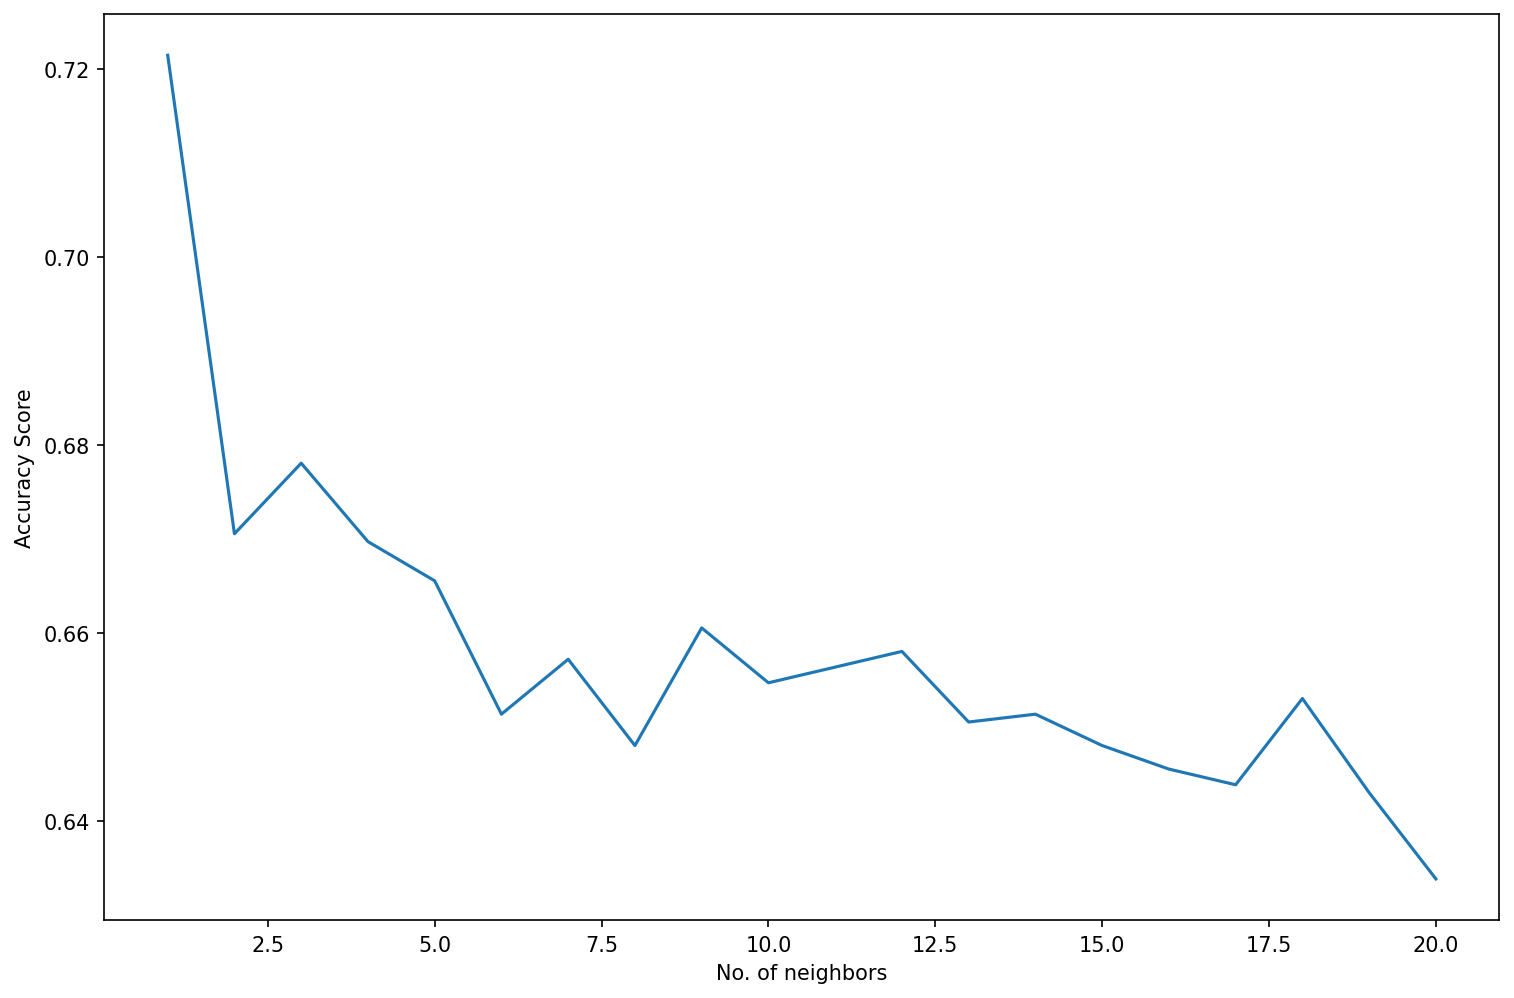

In [23]:
plt.figure(figsize=(12,8),dpi=150)
sns.lineplot(range(1,21),scores)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')

## K Nearest Neighbors Classifier

In [113]:
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [114]:
knc_pred = knc.predict(X_test)
print(classification_report(y_test,knc_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       593
         1.0       0.69      0.81      0.75       606

    accuracy                           0.72      1199
   macro avg       0.73      0.72      0.72      1199
weighted avg       0.73      0.72      0.72      1199



## Support Vector Classifier

In [26]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [27]:
svc_pred = svc.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.68      0.67       593
         1.0       0.68      0.67      0.68       606

    accuracy                           0.68      1199
   macro avg       0.68      0.68      0.68      1199
weighted avg       0.68      0.68      0.68      1199



## Decision Tree Classifier

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
dtree_pred = dtree.predict(X_test)
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.56      0.59       593
         1.0       0.61      0.67      0.64       606

    accuracy                           0.61      1199
   macro avg       0.61      0.61      0.61      1199
weighted avg       0.61      0.61      0.61      1199



## Searching for suitable value of no. of estimators for Random Forest model

In [30]:
scores = []
for i in range(100,901,100):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    scores.append(rfc.score(X_test,y_test))

Text(0, 0.5, 'Accuracy score')

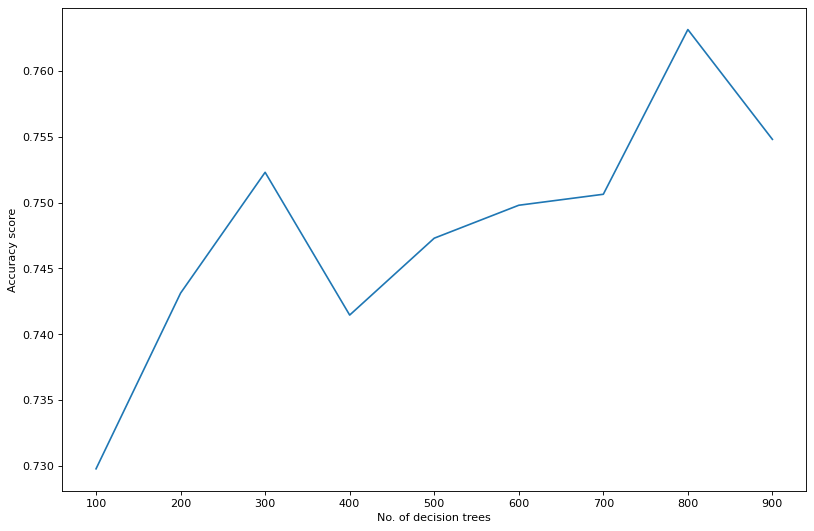

In [31]:
plt.figure(figsize=(12,8),dpi=80)
sns.lineplot(range(100,901,100),scores)
plt.xlabel('No. of decision trees')
plt.ylabel('Accuracy score')

In [32]:
temp = pd.concat([pd.Series(range(100,901,100)),pd.Series(scores)],axis=1)
temp.columns = ['No. of estimators','Score']
temp = temp.sort_values('Score',ascending=False)
noe = int(temp.iloc[0]['No. of estimators'])
noe

800

## Random Forest Classifier

In [33]:
rfc = RandomForestClassifier(n_estimators=noe)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=800)

In [34]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.78      0.76       593
         1.0       0.77      0.72      0.75       606

    accuracy                           0.75      1199
   macro avg       0.75      0.75      0.75      1199
weighted avg       0.75      0.75      0.75      1199



[[465 128]
 [168 438]]


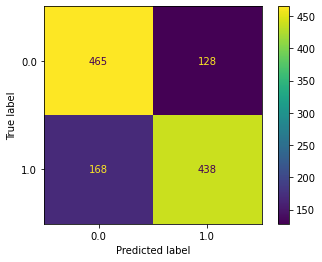

In [35]:
print(confusion_matrix(y_test,rfc_pred))
plot_confusion_matrix(rfc,X_test,y_test)

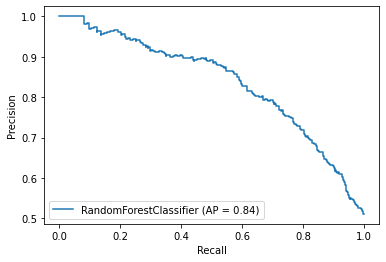

In [36]:
plot_precision_recall_curve(rfc,X_test,y_test)

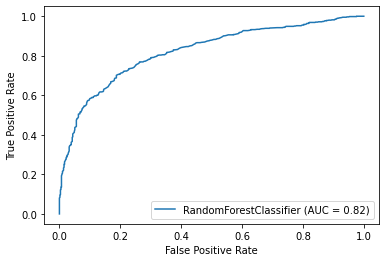

In [37]:
plot_roc_curve(rfc,X_test,y_test)

## Feature Importance

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

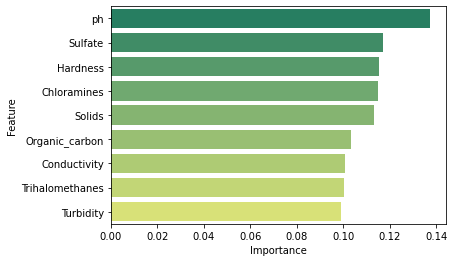

In [38]:
temp = pd.concat([pd.Series(features),pd.Series(rfc.feature_importances_)],axis=1)
temp.columns = ['Feature','Importance']
temp = temp.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=temp,orient='h',palette='summer')

ph is the most signficant feature whereas trihalomethanes is the least important feature.

## XG Boost Classifier

In [39]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       593
         1.0       0.68      0.68      0.68       606

    accuracy                           0.67      1199
   macro avg       0.67      0.67      0.67      1199
weighted avg       0.67      0.67      0.67      1199



## Gradient Boosting Classifier

In [41]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [42]:
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65       593
         1.0       0.65      0.64      0.64       606

    accuracy                           0.65      1199
   macro avg       0.65      0.65      0.65      1199
weighted avg       0.65      0.65      0.65      1199



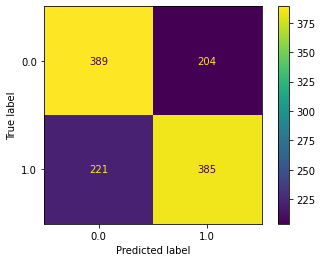

In [43]:
plot_confusion_matrix(gbc,X_test,y_test)

## Gaussian Naive Bayes

In [44]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

[[355 238]
 [285 321]]
              precision    recall  f1-score   support

         0.0       0.55      0.60      0.58       593
         1.0       0.57      0.53      0.55       606

    accuracy                           0.56      1199
   macro avg       0.56      0.56      0.56      1199
weighted avg       0.56      0.56      0.56      1199



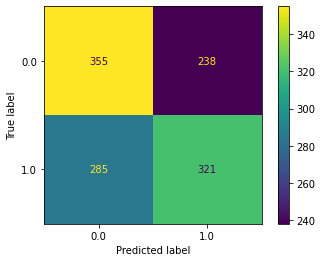

In [45]:
gnb_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,gnb_pred))
plot_confusion_matrix(gnb,X_test,y_test)
print(classification_report(y_test,gnb_pred))

## Bernoulli Naive Bayes

In [46]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

[[313 280]
 [309 297]]
              precision    recall  f1-score   support

         0.0       0.50      0.53      0.52       593
         1.0       0.51      0.49      0.50       606

    accuracy                           0.51      1199
   macro avg       0.51      0.51      0.51      1199
weighted avg       0.51      0.51      0.51      1199



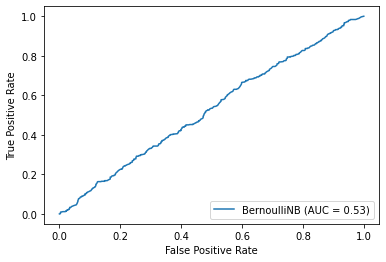

In [47]:
bnb_pred = bnb.predict(X_test)
print(confusion_matrix(y_test,bnb_pred))
plot_roc_curve(bnb,X_test,y_test)
print(classification_report(y_test,bnb_pred))

## SGD Classifier

In [48]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [49]:
sgd_pred = sgd.predict(X_test)
print(classification_report(y_test,sgd_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.72      0.59       593
         1.0       0.52      0.30      0.38       606

    accuracy                           0.51      1199
   macro avg       0.51      0.51      0.49      1199
weighted avg       0.51      0.51      0.48      1199



## Ridge Classifier

In [50]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

In [51]:
ridge_pred = ridge.predict(X_test)
print(classification_report(y_test,ridge_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.58      0.55       593
         1.0       0.54      0.48      0.51       606

    accuracy                           0.53      1199
   macro avg       0.53      0.53      0.53      1199
weighted avg       0.53      0.53      0.53      1199



## Passive Aggressive Classifier

In [52]:
passive_classifier = PassiveAggressiveClassifier()
passive_classifier.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [53]:
pac_pred = passive_classifier.predict(X_test)
print(classification_report(y_test,pac_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.45      0.47       593
         1.0       0.51      0.57      0.54       606

    accuracy                           0.51      1199
   macro avg       0.51      0.51      0.51      1199
weighted avg       0.51      0.51      0.51      1199



## Voting Classifier

In [54]:
model = VotingClassifier(estimators=[
                                     ('GBC',GradientBoostingClassifier()),
                                     ('XGB',XGBClassifier()),
                                     ('RF',RandomForestClassifier()),
                                     ('SVC',SVC()),
                                     ('KNC',KNeighborsClassifier(n_neighbors=2)),
                                     ('Cat',CatBoostClassifier()),
                                     ('ET',ExtraTreesClassifier())
                                    ],voting='hard')

In [55]:
accuracies = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=RepeatedStratifiedKFold(n_repeats=2,n_splits=5))
print("Mean Accuracy of Voting Classifier:",str(np.round(accuracies.mean()*100,2)) + '%')

Learning rate set to 0.014529
0:	learn: 0.6920694	total: 147ms	remaining: 2m 27s
1:	learn: 0.6910282	total: 150ms	remaining: 1m 14s
2:	learn: 0.6898448	total: 153ms	remaining: 50.7s
3:	learn: 0.6884089	total: 155ms	remaining: 38.6s
4:	learn: 0.6869530	total: 157ms	remaining: 31.3s
5:	learn: 0.6854937	total: 160ms	remaining: 26.4s
6:	learn: 0.6842344	total: 162ms	remaining: 22.9s
7:	learn: 0.6832443	total: 164ms	remaining: 20.3s
8:	learn: 0.6821108	total: 166ms	remaining: 18.3s
9:	learn: 0.6814551	total: 168ms	remaining: 16.7s
10:	learn: 0.6804320	total: 171ms	remaining: 15.4s
11:	learn: 0.6793263	total: 174ms	remaining: 14.3s
12:	learn: 0.6782734	total: 177ms	remaining: 13.4s
13:	learn: 0.6772873	total: 181ms	remaining: 12.7s
14:	learn: 0.6760418	total: 183ms	remaining: 12s
15:	learn: 0.6747421	total: 185ms	remaining: 11.4s
16:	learn: 0.6735064	total: 188ms	remaining: 10.9s
17:	learn: 0.6720230	total: 190ms	remaining: 10.4s
18:	learn: 0.6707459	total: 192ms	remaining: 9.92s
19:	learn: 

175:	learn: 0.5718602	total: 525ms	remaining: 2.46s
176:	learn: 0.5713427	total: 527ms	remaining: 2.45s
177:	learn: 0.5711912	total: 529ms	remaining: 2.44s
178:	learn: 0.5707984	total: 532ms	remaining: 2.44s
179:	learn: 0.5702323	total: 534ms	remaining: 2.43s
180:	learn: 0.5699885	total: 536ms	remaining: 2.43s
181:	learn: 0.5697199	total: 539ms	remaining: 2.42s
182:	learn: 0.5693954	total: 542ms	remaining: 2.42s
183:	learn: 0.5690833	total: 545ms	remaining: 2.42s
184:	learn: 0.5685863	total: 547ms	remaining: 2.41s
185:	learn: 0.5680350	total: 549ms	remaining: 2.4s
186:	learn: 0.5675960	total: 552ms	remaining: 2.4s
187:	learn: 0.5670159	total: 554ms	remaining: 2.39s
188:	learn: 0.5667859	total: 558ms	remaining: 2.39s
189:	learn: 0.5662795	total: 561ms	remaining: 2.39s
190:	learn: 0.5659604	total: 563ms	remaining: 2.38s
191:	learn: 0.5653212	total: 565ms	remaining: 2.38s
192:	learn: 0.5646446	total: 567ms	remaining: 2.37s
193:	learn: 0.5642929	total: 569ms	remaining: 2.36s
194:	learn: 0.

335:	learn: 0.5142671	total: 877ms	remaining: 1.73s
336:	learn: 0.5138463	total: 879ms	remaining: 1.73s
337:	learn: 0.5136910	total: 882ms	remaining: 1.73s
338:	learn: 0.5133402	total: 884ms	remaining: 1.72s
339:	learn: 0.5130088	total: 887ms	remaining: 1.72s
340:	learn: 0.5126306	total: 889ms	remaining: 1.72s
341:	learn: 0.5123353	total: 891ms	remaining: 1.71s
342:	learn: 0.5120729	total: 893ms	remaining: 1.71s
343:	learn: 0.5119152	total: 895ms	remaining: 1.71s
344:	learn: 0.5115807	total: 897ms	remaining: 1.7s
345:	learn: 0.5112804	total: 900ms	remaining: 1.7s
346:	learn: 0.5109458	total: 902ms	remaining: 1.7s
347:	learn: 0.5106576	total: 904ms	remaining: 1.69s
348:	learn: 0.5105030	total: 906ms	remaining: 1.69s
349:	learn: 0.5102683	total: 908ms	remaining: 1.69s
350:	learn: 0.5098987	total: 910ms	remaining: 1.68s
351:	learn: 0.5096163	total: 912ms	remaining: 1.68s
352:	learn: 0.5094463	total: 914ms	remaining: 1.68s
353:	learn: 0.5091858	total: 916ms	remaining: 1.67s
354:	learn: 0.5

500:	learn: 0.4678837	total: 1.23s	remaining: 1.22s
501:	learn: 0.4675997	total: 1.23s	remaining: 1.22s
502:	learn: 0.4673936	total: 1.23s	remaining: 1.22s
503:	learn: 0.4672289	total: 1.24s	remaining: 1.22s
504:	learn: 0.4669901	total: 1.24s	remaining: 1.21s
505:	learn: 0.4665563	total: 1.24s	remaining: 1.21s
506:	learn: 0.4661761	total: 1.24s	remaining: 1.21s
507:	learn: 0.4658706	total: 1.25s	remaining: 1.21s
508:	learn: 0.4655021	total: 1.25s	remaining: 1.2s
509:	learn: 0.4652114	total: 1.25s	remaining: 1.2s
510:	learn: 0.4649645	total: 1.25s	remaining: 1.2s
511:	learn: 0.4646386	total: 1.25s	remaining: 1.2s
512:	learn: 0.4643783	total: 1.26s	remaining: 1.19s
513:	learn: 0.4641055	total: 1.26s	remaining: 1.19s
514:	learn: 0.4638086	total: 1.26s	remaining: 1.19s
515:	learn: 0.4634328	total: 1.26s	remaining: 1.18s
516:	learn: 0.4630773	total: 1.26s	remaining: 1.18s
517:	learn: 0.4628782	total: 1.27s	remaining: 1.18s
518:	learn: 0.4626926	total: 1.27s	remaining: 1.18s
519:	learn: 0.46

665:	learn: 0.4241222	total: 1.58s	remaining: 794ms
666:	learn: 0.4237840	total: 1.59s	remaining: 792ms
667:	learn: 0.4235471	total: 1.59s	remaining: 789ms
668:	learn: 0.4232849	total: 1.59s	remaining: 787ms
669:	learn: 0.4230316	total: 1.59s	remaining: 785ms
670:	learn: 0.4227853	total: 1.59s	remaining: 782ms
671:	learn: 0.4224109	total: 1.6s	remaining: 780ms
672:	learn: 0.4222230	total: 1.6s	remaining: 778ms
673:	learn: 0.4219258	total: 1.6s	remaining: 775ms
674:	learn: 0.4218138	total: 1.6s	remaining: 773ms
675:	learn: 0.4215233	total: 1.61s	remaining: 770ms
676:	learn: 0.4213520	total: 1.61s	remaining: 768ms
677:	learn: 0.4211367	total: 1.61s	remaining: 765ms
678:	learn: 0.4208844	total: 1.61s	remaining: 763ms
679:	learn: 0.4206740	total: 1.61s	remaining: 760ms
680:	learn: 0.4204421	total: 1.62s	remaining: 758ms
681:	learn: 0.4203359	total: 1.62s	remaining: 755ms
682:	learn: 0.4201658	total: 1.62s	remaining: 753ms
683:	learn: 0.4198742	total: 1.62s	remaining: 750ms
684:	learn: 0.41

830:	learn: 0.3830552	total: 1.94s	remaining: 394ms
831:	learn: 0.3828532	total: 1.94s	remaining: 392ms
832:	learn: 0.3826900	total: 1.94s	remaining: 390ms
833:	learn: 0.3824254	total: 1.95s	remaining: 387ms
834:	learn: 0.3822823	total: 1.95s	remaining: 385ms
835:	learn: 0.3821061	total: 1.95s	remaining: 383ms
836:	learn: 0.3819146	total: 1.95s	remaining: 380ms
837:	learn: 0.3816847	total: 1.96s	remaining: 378ms
838:	learn: 0.3814334	total: 1.96s	remaining: 376ms
839:	learn: 0.3811955	total: 1.96s	remaining: 373ms
840:	learn: 0.3810003	total: 1.96s	remaining: 371ms
841:	learn: 0.3807596	total: 1.96s	remaining: 369ms
842:	learn: 0.3805168	total: 1.97s	remaining: 366ms
843:	learn: 0.3803570	total: 1.97s	remaining: 364ms
844:	learn: 0.3801331	total: 1.97s	remaining: 361ms
845:	learn: 0.3799222	total: 1.97s	remaining: 359ms
846:	learn: 0.3795023	total: 1.97s	remaining: 357ms
847:	learn: 0.3792673	total: 1.98s	remaining: 354ms
848:	learn: 0.3790066	total: 1.98s	remaining: 352ms
849:	learn: 

993:	learn: 0.3485045	total: 2.29s	remaining: 13.8ms
994:	learn: 0.3481928	total: 2.29s	remaining: 11.5ms
995:	learn: 0.3480188	total: 2.3s	remaining: 9.23ms
996:	learn: 0.3477874	total: 2.3s	remaining: 6.92ms
997:	learn: 0.3476103	total: 2.3s	remaining: 4.62ms
998:	learn: 0.3474283	total: 2.31s	remaining: 2.31ms
999:	learn: 0.3471930	total: 2.31s	remaining: 0us
Learning rate set to 0.014529
0:	learn: 0.6919847	total: 2.39ms	remaining: 2.39s
1:	learn: 0.6905088	total: 4.74ms	remaining: 2.36s
2:	learn: 0.6893809	total: 6.88ms	remaining: 2.29s
3:	learn: 0.6878954	total: 8.93ms	remaining: 2.22s
4:	learn: 0.6864713	total: 10.9ms	remaining: 2.17s
5:	learn: 0.6850907	total: 12.9ms	remaining: 2.14s
6:	learn: 0.6841375	total: 14.9ms	remaining: 2.12s
7:	learn: 0.6829030	total: 17.1ms	remaining: 2.12s
8:	learn: 0.6820450	total: 19.1ms	remaining: 2.11s
9:	learn: 0.6808218	total: 21.1ms	remaining: 2.09s
10:	learn: 0.6798761	total: 23.2ms	remaining: 2.08s
11:	learn: 0.6789909	total: 25.2ms	remainin

162:	learn: 0.5786421	total: 341ms	remaining: 1.75s
163:	learn: 0.5780979	total: 343ms	remaining: 1.75s
164:	learn: 0.5775939	total: 345ms	remaining: 1.75s
165:	learn: 0.5771275	total: 348ms	remaining: 1.75s
166:	learn: 0.5767552	total: 350ms	remaining: 1.75s
167:	learn: 0.5762181	total: 353ms	remaining: 1.75s
168:	learn: 0.5753648	total: 355ms	remaining: 1.74s
169:	learn: 0.5747371	total: 357ms	remaining: 1.74s
170:	learn: 0.5741681	total: 359ms	remaining: 1.74s
171:	learn: 0.5737415	total: 361ms	remaining: 1.74s
172:	learn: 0.5732033	total: 363ms	remaining: 1.74s
173:	learn: 0.5729040	total: 365ms	remaining: 1.73s
174:	learn: 0.5722057	total: 367ms	remaining: 1.73s
175:	learn: 0.5718270	total: 370ms	remaining: 1.73s
176:	learn: 0.5713899	total: 372ms	remaining: 1.73s
177:	learn: 0.5706729	total: 375ms	remaining: 1.73s
178:	learn: 0.5700347	total: 378ms	remaining: 1.73s
179:	learn: 0.5693532	total: 380ms	remaining: 1.73s
180:	learn: 0.5689279	total: 383ms	remaining: 1.73s
181:	learn: 

329:	learn: 0.5133917	total: 696ms	remaining: 1.41s
330:	learn: 0.5129908	total: 698ms	remaining: 1.41s
331:	learn: 0.5128481	total: 700ms	remaining: 1.41s
332:	learn: 0.5125431	total: 702ms	remaining: 1.41s
333:	learn: 0.5122836	total: 705ms	remaining: 1.41s
334:	learn: 0.5119529	total: 707ms	remaining: 1.4s
335:	learn: 0.5115594	total: 709ms	remaining: 1.4s
336:	learn: 0.5113797	total: 711ms	remaining: 1.4s
337:	learn: 0.5111681	total: 713ms	remaining: 1.4s
338:	learn: 0.5109652	total: 715ms	remaining: 1.39s
339:	learn: 0.5106979	total: 717ms	remaining: 1.39s
340:	learn: 0.5103590	total: 719ms	remaining: 1.39s
341:	learn: 0.5098400	total: 721ms	remaining: 1.39s
342:	learn: 0.5093089	total: 724ms	remaining: 1.39s
343:	learn: 0.5090533	total: 726ms	remaining: 1.38s
344:	learn: 0.5086612	total: 728ms	remaining: 1.38s
345:	learn: 0.5082941	total: 730ms	remaining: 1.38s
346:	learn: 0.5080486	total: 732ms	remaining: 1.38s
347:	learn: 0.5075341	total: 734ms	remaining: 1.37s
348:	learn: 0.50

497:	learn: 0.4655597	total: 1.05s	remaining: 1.06s
498:	learn: 0.4652522	total: 1.05s	remaining: 1.05s
499:	learn: 0.4649136	total: 1.05s	remaining: 1.05s
500:	learn: 0.4646394	total: 1.05s	remaining: 1.05s
501:	learn: 0.4643012	total: 1.06s	remaining: 1.05s
502:	learn: 0.4640015	total: 1.06s	remaining: 1.05s
503:	learn: 0.4636967	total: 1.06s	remaining: 1.04s
504:	learn: 0.4633956	total: 1.06s	remaining: 1.04s
505:	learn: 0.4631503	total: 1.07s	remaining: 1.04s
506:	learn: 0.4627595	total: 1.07s	remaining: 1.04s
507:	learn: 0.4626279	total: 1.07s	remaining: 1.04s
508:	learn: 0.4623994	total: 1.07s	remaining: 1.03s
509:	learn: 0.4621896	total: 1.08s	remaining: 1.03s
510:	learn: 0.4618715	total: 1.08s	remaining: 1.03s
511:	learn: 0.4615085	total: 1.08s	remaining: 1.03s
512:	learn: 0.4613051	total: 1.08s	remaining: 1.03s
513:	learn: 0.4610992	total: 1.08s	remaining: 1.02s
514:	learn: 0.4608132	total: 1.09s	remaining: 1.02s
515:	learn: 0.4605507	total: 1.09s	remaining: 1.02s
516:	learn: 

658:	learn: 0.4220316	total: 1.4s	remaining: 725ms
659:	learn: 0.4217451	total: 1.4s	remaining: 723ms
660:	learn: 0.4213757	total: 1.41s	remaining: 721ms
661:	learn: 0.4212386	total: 1.41s	remaining: 719ms
662:	learn: 0.4209170	total: 1.41s	remaining: 717ms
663:	learn: 0.4206527	total: 1.41s	remaining: 715ms
664:	learn: 0.4203913	total: 1.42s	remaining: 713ms
665:	learn: 0.4201521	total: 1.42s	remaining: 712ms
666:	learn: 0.4199100	total: 1.42s	remaining: 710ms
667:	learn: 0.4196009	total: 1.42s	remaining: 708ms
668:	learn: 0.4192655	total: 1.43s	remaining: 706ms
669:	learn: 0.4191000	total: 1.43s	remaining: 704ms
670:	learn: 0.4188796	total: 1.43s	remaining: 702ms
671:	learn: 0.4187249	total: 1.43s	remaining: 700ms
672:	learn: 0.4184470	total: 1.44s	remaining: 698ms
673:	learn: 0.4180593	total: 1.44s	remaining: 696ms
674:	learn: 0.4177957	total: 1.44s	remaining: 694ms
675:	learn: 0.4175498	total: 1.44s	remaining: 692ms
676:	learn: 0.4173373	total: 1.45s	remaining: 690ms
677:	learn: 0.

817:	learn: 0.3836834	total: 1.93s	remaining: 430ms
818:	learn: 0.3834494	total: 1.94s	remaining: 428ms
819:	learn: 0.3832652	total: 1.94s	remaining: 427ms
820:	learn: 0.3830073	total: 1.95s	remaining: 425ms
821:	learn: 0.3828149	total: 1.95s	remaining: 423ms
822:	learn: 0.3825814	total: 1.96s	remaining: 421ms
823:	learn: 0.3824816	total: 1.96s	remaining: 419ms
824:	learn: 0.3821270	total: 1.97s	remaining: 418ms
825:	learn: 0.3818369	total: 1.98s	remaining: 416ms
826:	learn: 0.3815881	total: 1.99s	remaining: 416ms
827:	learn: 0.3814434	total: 1.99s	remaining: 414ms
828:	learn: 0.3812257	total: 2s	remaining: 412ms
829:	learn: 0.3809613	total: 2s	remaining: 410ms
830:	learn: 0.3807381	total: 2s	remaining: 408ms
831:	learn: 0.3805783	total: 2.01s	remaining: 405ms
832:	learn: 0.3803417	total: 2.01s	remaining: 403ms
833:	learn: 0.3801535	total: 2.02s	remaining: 401ms
834:	learn: 0.3798278	total: 2.02s	remaining: 399ms
835:	learn: 0.3795388	total: 2.02s	remaining: 397ms
836:	learn: 0.3794249

Learning rate set to 0.014532
0:	learn: 0.6918710	total: 2.28ms	remaining: 2.27s
1:	learn: 0.6911699	total: 4.74ms	remaining: 2.37s
2:	learn: 0.6899537	total: 6.93ms	remaining: 2.3s
3:	learn: 0.6884000	total: 9.03ms	remaining: 2.25s
4:	learn: 0.6873658	total: 11.2ms	remaining: 2.23s
5:	learn: 0.6859219	total: 13.3ms	remaining: 2.2s
6:	learn: 0.6847006	total: 15.3ms	remaining: 2.17s
7:	learn: 0.6835774	total: 17.3ms	remaining: 2.14s
8:	learn: 0.6826124	total: 19.6ms	remaining: 2.16s
9:	learn: 0.6812469	total: 21.8ms	remaining: 2.15s
10:	learn: 0.6802044	total: 24.5ms	remaining: 2.2s
11:	learn: 0.6791181	total: 26.7ms	remaining: 2.2s
12:	learn: 0.6781547	total: 28.8ms	remaining: 2.19s
13:	learn: 0.6771031	total: 31.1ms	remaining: 2.19s
14:	learn: 0.6757985	total: 33.5ms	remaining: 2.2s
15:	learn: 0.6744987	total: 35.8ms	remaining: 2.2s
16:	learn: 0.6732329	total: 38.3ms	remaining: 2.21s
17:	learn: 0.6721416	total: 40.4ms	remaining: 2.2s
18:	learn: 0.6708840	total: 42.5ms	remaining: 2.19s

213:	learn: 0.5581879	total: 524ms	remaining: 1.92s
214:	learn: 0.5578850	total: 527ms	remaining: 1.92s
215:	learn: 0.5575369	total: 529ms	remaining: 1.92s
216:	learn: 0.5571036	total: 532ms	remaining: 1.92s
217:	learn: 0.5565695	total: 535ms	remaining: 1.92s
218:	learn: 0.5561231	total: 538ms	remaining: 1.92s
219:	learn: 0.5555958	total: 540ms	remaining: 1.92s
220:	learn: 0.5553493	total: 543ms	remaining: 1.91s
221:	learn: 0.5550565	total: 546ms	remaining: 1.91s
222:	learn: 0.5547367	total: 549ms	remaining: 1.91s
223:	learn: 0.5540814	total: 552ms	remaining: 1.91s
224:	learn: 0.5537559	total: 555ms	remaining: 1.91s
225:	learn: 0.5534901	total: 558ms	remaining: 1.91s
226:	learn: 0.5532426	total: 561ms	remaining: 1.91s
227:	learn: 0.5528372	total: 564ms	remaining: 1.91s
228:	learn: 0.5524530	total: 566ms	remaining: 1.91s
229:	learn: 0.5521394	total: 569ms	remaining: 1.91s
230:	learn: 0.5515520	total: 572ms	remaining: 1.9s
231:	learn: 0.5513058	total: 575ms	remaining: 1.9s
232:	learn: 0.

401:	learn: 0.4982436	total: 1.06s	remaining: 1.57s
402:	learn: 0.4978582	total: 1.06s	remaining: 1.57s
403:	learn: 0.4975803	total: 1.06s	remaining: 1.57s
404:	learn: 0.4971636	total: 1.06s	remaining: 1.56s
405:	learn: 0.4970203	total: 1.07s	remaining: 1.56s
406:	learn: 0.4967874	total: 1.07s	remaining: 1.56s
407:	learn: 0.4963534	total: 1.07s	remaining: 1.56s
408:	learn: 0.4962144	total: 1.08s	remaining: 1.56s
409:	learn: 0.4959462	total: 1.08s	remaining: 1.55s
410:	learn: 0.4956995	total: 1.08s	remaining: 1.55s
411:	learn: 0.4952796	total: 1.08s	remaining: 1.55s
412:	learn: 0.4951246	total: 1.09s	remaining: 1.55s
413:	learn: 0.4949738	total: 1.09s	remaining: 1.54s
414:	learn: 0.4947660	total: 1.09s	remaining: 1.54s
415:	learn: 0.4943673	total: 1.1s	remaining: 1.54s
416:	learn: 0.4942353	total: 1.1s	remaining: 1.54s
417:	learn: 0.4939871	total: 1.1s	remaining: 1.53s
418:	learn: 0.4937239	total: 1.1s	remaining: 1.53s
419:	learn: 0.4934149	total: 1.11s	remaining: 1.53s
420:	learn: 0.49

586:	learn: 0.4508475	total: 1.59s	remaining: 1.12s
587:	learn: 0.4505772	total: 1.59s	remaining: 1.11s
588:	learn: 0.4503515	total: 1.59s	remaining: 1.11s
589:	learn: 0.4500676	total: 1.6s	remaining: 1.11s
590:	learn: 0.4499287	total: 1.6s	remaining: 1.11s
591:	learn: 0.4495927	total: 1.6s	remaining: 1.1s
592:	learn: 0.4492838	total: 1.6s	remaining: 1.1s
593:	learn: 0.4490856	total: 1.61s	remaining: 1.1s
594:	learn: 0.4487610	total: 1.61s	remaining: 1.1s
595:	learn: 0.4485008	total: 1.62s	remaining: 1.09s
596:	learn: 0.4482333	total: 1.62s	remaining: 1.09s
597:	learn: 0.4478778	total: 1.62s	remaining: 1.09s
598:	learn: 0.4477076	total: 1.63s	remaining: 1.09s
599:	learn: 0.4474210	total: 1.63s	remaining: 1.09s
600:	learn: 0.4471742	total: 1.63s	remaining: 1.08s
601:	learn: 0.4469361	total: 1.64s	remaining: 1.08s
602:	learn: 0.4467464	total: 1.64s	remaining: 1.08s
603:	learn: 0.4465074	total: 1.64s	remaining: 1.08s
604:	learn: 0.4463240	total: 1.65s	remaining: 1.07s
605:	learn: 0.446093

794:	learn: 0.4022806	total: 2.29s	remaining: 590ms
795:	learn: 0.4019956	total: 2.29s	remaining: 587ms
796:	learn: 0.4017505	total: 2.29s	remaining: 584ms
797:	learn: 0.4014763	total: 2.3s	remaining: 581ms
798:	learn: 0.4012921	total: 2.3s	remaining: 579ms
799:	learn: 0.4011455	total: 2.3s	remaining: 576ms
800:	learn: 0.4008366	total: 2.31s	remaining: 573ms
801:	learn: 0.4006209	total: 2.31s	remaining: 570ms
802:	learn: 0.4003847	total: 2.31s	remaining: 567ms
803:	learn: 0.4001242	total: 2.31s	remaining: 564ms
804:	learn: 0.3998331	total: 2.32s	remaining: 561ms
805:	learn: 0.3995963	total: 2.32s	remaining: 558ms
806:	learn: 0.3993468	total: 2.32s	remaining: 555ms
807:	learn: 0.3991470	total: 2.32s	remaining: 552ms
808:	learn: 0.3989426	total: 2.33s	remaining: 549ms
809:	learn: 0.3986564	total: 2.33s	remaining: 547ms
810:	learn: 0.3982532	total: 2.33s	remaining: 544ms
811:	learn: 0.3981445	total: 2.33s	remaining: 541ms
812:	learn: 0.3979121	total: 2.34s	remaining: 538ms
813:	learn: 0.3

979:	learn: 0.3627160	total: 2.82s	remaining: 57.5ms
980:	learn: 0.3624214	total: 2.82s	remaining: 54.7ms
981:	learn: 0.3622107	total: 2.83s	remaining: 51.8ms
982:	learn: 0.3619851	total: 2.83s	remaining: 48.9ms
983:	learn: 0.3617798	total: 2.83s	remaining: 46.1ms
984:	learn: 0.3615389	total: 2.84s	remaining: 43.2ms
985:	learn: 0.3612759	total: 2.84s	remaining: 40.3ms
986:	learn: 0.3609670	total: 2.84s	remaining: 37.4ms
987:	learn: 0.3607657	total: 2.85s	remaining: 34.6ms
988:	learn: 0.3605943	total: 2.85s	remaining: 31.7ms
989:	learn: 0.3605190	total: 2.85s	remaining: 28.8ms
990:	learn: 0.3603094	total: 2.86s	remaining: 26ms
991:	learn: 0.3600578	total: 2.86s	remaining: 23.1ms
992:	learn: 0.3597717	total: 2.86s	remaining: 20.2ms
993:	learn: 0.3595670	total: 2.87s	remaining: 17.3ms
994:	learn: 0.3594253	total: 2.87s	remaining: 14.4ms
995:	learn: 0.3592591	total: 2.87s	remaining: 11.5ms
996:	learn: 0.3591811	total: 2.88s	remaining: 8.66ms
997:	learn: 0.3590688	total: 2.88s	remaining: 5.

195:	learn: 0.5641856	total: 514ms	remaining: 2.11s
196:	learn: 0.5636509	total: 517ms	remaining: 2.11s
197:	learn: 0.5632851	total: 520ms	remaining: 2.11s
198:	learn: 0.5627131	total: 523ms	remaining: 2.1s
199:	learn: 0.5624589	total: 526ms	remaining: 2.1s
200:	learn: 0.5622038	total: 530ms	remaining: 2.1s
201:	learn: 0.5619460	total: 533ms	remaining: 2.1s
202:	learn: 0.5615570	total: 536ms	remaining: 2.1s
203:	learn: 0.5609139	total: 538ms	remaining: 2.1s
204:	learn: 0.5602094	total: 541ms	remaining: 2.1s
205:	learn: 0.5599353	total: 544ms	remaining: 2.1s
206:	learn: 0.5596956	total: 547ms	remaining: 2.1s
207:	learn: 0.5593287	total: 550ms	remaining: 2.1s
208:	learn: 0.5590867	total: 553ms	remaining: 2.09s
209:	learn: 0.5586431	total: 556ms	remaining: 2.09s
210:	learn: 0.5582555	total: 558ms	remaining: 2.09s
211:	learn: 0.5576489	total: 561ms	remaining: 2.08s
212:	learn: 0.5572245	total: 564ms	remaining: 2.08s
213:	learn: 0.5569501	total: 567ms	remaining: 2.08s
214:	learn: 0.5566642	

383:	learn: 0.4998180	total: 1.05s	remaining: 1.68s
384:	learn: 0.4994330	total: 1.05s	remaining: 1.68s
385:	learn: 0.4992477	total: 1.05s	remaining: 1.67s
386:	learn: 0.4989388	total: 1.05s	remaining: 1.67s
387:	learn: 0.4987050	total: 1.06s	remaining: 1.67s
388:	learn: 0.4984365	total: 1.06s	remaining: 1.67s
389:	learn: 0.4982503	total: 1.06s	remaining: 1.67s
390:	learn: 0.4980892	total: 1.07s	remaining: 1.66s
391:	learn: 0.4977476	total: 1.07s	remaining: 1.66s
392:	learn: 0.4974214	total: 1.07s	remaining: 1.66s
393:	learn: 0.4971579	total: 1.08s	remaining: 1.66s
394:	learn: 0.4968765	total: 1.08s	remaining: 1.65s
395:	learn: 0.4965563	total: 1.08s	remaining: 1.65s
396:	learn: 0.4962478	total: 1.08s	remaining: 1.65s
397:	learn: 0.4960095	total: 1.09s	remaining: 1.64s
398:	learn: 0.4957591	total: 1.09s	remaining: 1.64s
399:	learn: 0.4954074	total: 1.09s	remaining: 1.64s
400:	learn: 0.4949529	total: 1.09s	remaining: 1.64s
401:	learn: 0.4947638	total: 1.1s	remaining: 1.64s
402:	learn: 0

564:	learn: 0.4487902	total: 1.58s	remaining: 1.22s
565:	learn: 0.4485016	total: 1.58s	remaining: 1.21s
566:	learn: 0.4482207	total: 1.58s	remaining: 1.21s
567:	learn: 0.4480825	total: 1.59s	remaining: 1.21s
568:	learn: 0.4478760	total: 1.59s	remaining: 1.21s
569:	learn: 0.4476537	total: 1.6s	remaining: 1.2s
570:	learn: 0.4473035	total: 1.6s	remaining: 1.2s
571:	learn: 0.4471377	total: 1.6s	remaining: 1.2s
572:	learn: 0.4469073	total: 1.6s	remaining: 1.2s
573:	learn: 0.4465664	total: 1.61s	remaining: 1.19s
574:	learn: 0.4463257	total: 1.61s	remaining: 1.19s
575:	learn: 0.4460208	total: 1.61s	remaining: 1.19s
576:	learn: 0.4457879	total: 1.62s	remaining: 1.19s
577:	learn: 0.4455253	total: 1.62s	remaining: 1.18s
578:	learn: 0.4452199	total: 1.62s	remaining: 1.18s
579:	learn: 0.4450081	total: 1.63s	remaining: 1.18s
580:	learn: 0.4446980	total: 1.63s	remaining: 1.17s
581:	learn: 0.4444622	total: 1.63s	remaining: 1.17s
582:	learn: 0.4441831	total: 1.64s	remaining: 1.17s
583:	learn: 0.443918

752:	learn: 0.4004241	total: 2.11s	remaining: 693ms
753:	learn: 0.4001490	total: 2.12s	remaining: 690ms
754:	learn: 0.3998757	total: 2.12s	remaining: 687ms
755:	learn: 0.3997695	total: 2.12s	remaining: 685ms
756:	learn: 0.3995175	total: 2.12s	remaining: 682ms
757:	learn: 0.3993360	total: 2.13s	remaining: 679ms
758:	learn: 0.3991159	total: 2.13s	remaining: 676ms
759:	learn: 0.3988797	total: 2.13s	remaining: 674ms
760:	learn: 0.3986014	total: 2.14s	remaining: 671ms
761:	learn: 0.3983177	total: 2.14s	remaining: 668ms
762:	learn: 0.3980773	total: 2.14s	remaining: 665ms
763:	learn: 0.3977953	total: 2.15s	remaining: 663ms
764:	learn: 0.3976530	total: 2.15s	remaining: 660ms
765:	learn: 0.3974059	total: 2.15s	remaining: 657ms
766:	learn: 0.3971137	total: 2.15s	remaining: 654ms
767:	learn: 0.3968480	total: 2.16s	remaining: 652ms
768:	learn: 0.3965976	total: 2.16s	remaining: 649ms
769:	learn: 0.3963925	total: 2.16s	remaining: 646ms
770:	learn: 0.3961694	total: 2.17s	remaining: 643ms
771:	learn: 

925:	learn: 0.3598117	total: 2.64s	remaining: 211ms
926:	learn: 0.3596320	total: 2.65s	remaining: 208ms
927:	learn: 0.3595066	total: 2.65s	remaining: 206ms
928:	learn: 0.3593241	total: 2.65s	remaining: 203ms
929:	learn: 0.3590183	total: 2.66s	remaining: 200ms
930:	learn: 0.3587827	total: 2.66s	remaining: 197ms
931:	learn: 0.3585915	total: 2.66s	remaining: 194ms
932:	learn: 0.3583124	total: 2.67s	remaining: 191ms
933:	learn: 0.3581268	total: 2.67s	remaining: 189ms
934:	learn: 0.3579912	total: 2.67s	remaining: 186ms
935:	learn: 0.3576716	total: 2.67s	remaining: 183ms
936:	learn: 0.3573972	total: 2.68s	remaining: 180ms
937:	learn: 0.3571156	total: 2.68s	remaining: 177ms
938:	learn: 0.3568732	total: 2.68s	remaining: 174ms
939:	learn: 0.3566980	total: 2.69s	remaining: 171ms
940:	learn: 0.3564594	total: 2.69s	remaining: 169ms
941:	learn: 0.3562572	total: 2.69s	remaining: 166ms
942:	learn: 0.3560523	total: 2.7s	remaining: 163ms
943:	learn: 0.3558196	total: 2.7s	remaining: 160ms
944:	learn: 0.

140:	learn: 0.5879060	total: 345ms	remaining: 2.1s
141:	learn: 0.5873003	total: 348ms	remaining: 2.1s
142:	learn: 0.5869197	total: 354ms	remaining: 2.12s
143:	learn: 0.5864178	total: 357ms	remaining: 2.12s
144:	learn: 0.5861467	total: 360ms	remaining: 2.12s
145:	learn: 0.5856005	total: 364ms	remaining: 2.13s
146:	learn: 0.5852125	total: 371ms	remaining: 2.15s
147:	learn: 0.5847565	total: 374ms	remaining: 2.15s
148:	learn: 0.5844382	total: 377ms	remaining: 2.15s
149:	learn: 0.5839833	total: 380ms	remaining: 2.16s
150:	learn: 0.5836156	total: 387ms	remaining: 2.17s
151:	learn: 0.5831301	total: 390ms	remaining: 2.17s
152:	learn: 0.5824376	total: 393ms	remaining: 2.17s
153:	learn: 0.5820262	total: 397ms	remaining: 2.18s
154:	learn: 0.5815361	total: 402ms	remaining: 2.19s
155:	learn: 0.5807907	total: 405ms	remaining: 2.19s
156:	learn: 0.5802215	total: 408ms	remaining: 2.19s
157:	learn: 0.5799001	total: 413ms	remaining: 2.2s
158:	learn: 0.5794604	total: 417ms	remaining: 2.21s
159:	learn: 0.5

346:	learn: 0.5095946	total: 1.04s	remaining: 1.96s
347:	learn: 0.5093326	total: 1.05s	remaining: 1.96s
348:	learn: 0.5090876	total: 1.05s	remaining: 1.96s
349:	learn: 0.5087340	total: 1.05s	remaining: 1.95s
350:	learn: 0.5084235	total: 1.05s	remaining: 1.95s
351:	learn: 0.5080146	total: 1.06s	remaining: 1.95s
352:	learn: 0.5077607	total: 1.06s	remaining: 1.95s
353:	learn: 0.5074694	total: 1.06s	remaining: 1.94s
354:	learn: 0.5071557	total: 1.07s	remaining: 1.94s
355:	learn: 0.5068854	total: 1.07s	remaining: 1.94s
356:	learn: 0.5065302	total: 1.07s	remaining: 1.93s
357:	learn: 0.5062587	total: 1.07s	remaining: 1.93s
358:	learn: 0.5059256	total: 1.08s	remaining: 1.93s
359:	learn: 0.5054816	total: 1.08s	remaining: 1.92s
360:	learn: 0.5050456	total: 1.08s	remaining: 1.92s
361:	learn: 0.5046788	total: 1.09s	remaining: 1.92s
362:	learn: 0.5042407	total: 1.09s	remaining: 1.91s
363:	learn: 0.5039576	total: 1.09s	remaining: 1.91s
364:	learn: 0.5036850	total: 1.09s	remaining: 1.91s
365:	learn: 

529:	learn: 0.4562111	total: 1.57s	remaining: 1.4s
530:	learn: 0.4559042	total: 1.58s	remaining: 1.39s
531:	learn: 0.4555781	total: 1.58s	remaining: 1.39s
532:	learn: 0.4553431	total: 1.58s	remaining: 1.39s
533:	learn: 0.4550902	total: 1.59s	remaining: 1.38s
534:	learn: 0.4546833	total: 1.59s	remaining: 1.38s
535:	learn: 0.4544195	total: 1.59s	remaining: 1.38s
536:	learn: 0.4539451	total: 1.59s	remaining: 1.38s
537:	learn: 0.4535385	total: 1.6s	remaining: 1.37s
538:	learn: 0.4532031	total: 1.6s	remaining: 1.37s
539:	learn: 0.4530110	total: 1.6s	remaining: 1.36s
540:	learn: 0.4527684	total: 1.61s	remaining: 1.36s
541:	learn: 0.4524946	total: 1.61s	remaining: 1.36s
542:	learn: 0.4521496	total: 1.61s	remaining: 1.36s
543:	learn: 0.4520033	total: 1.61s	remaining: 1.35s
544:	learn: 0.4517698	total: 1.62s	remaining: 1.35s
545:	learn: 0.4514943	total: 1.62s	remaining: 1.35s
546:	learn: 0.4512606	total: 1.62s	remaining: 1.34s
547:	learn: 0.4509781	total: 1.63s	remaining: 1.34s
548:	learn: 0.45

710:	learn: 0.4072864	total: 2.1s	remaining: 854ms
711:	learn: 0.4070393	total: 2.1s	remaining: 852ms
712:	learn: 0.4067411	total: 2.11s	remaining: 849ms
713:	learn: 0.4064534	total: 2.11s	remaining: 846ms
714:	learn: 0.4062119	total: 2.11s	remaining: 843ms
715:	learn: 0.4059644	total: 2.12s	remaining: 840ms
716:	learn: 0.4056957	total: 2.12s	remaining: 837ms
717:	learn: 0.4054769	total: 2.12s	remaining: 834ms
718:	learn: 0.4052965	total: 2.13s	remaining: 831ms
719:	learn: 0.4051176	total: 2.13s	remaining: 828ms
720:	learn: 0.4048820	total: 2.13s	remaining: 825ms
721:	learn: 0.4047260	total: 2.13s	remaining: 822ms
722:	learn: 0.4044124	total: 2.14s	remaining: 819ms
723:	learn: 0.4041916	total: 2.14s	remaining: 816ms
724:	learn: 0.4040338	total: 2.14s	remaining: 813ms
725:	learn: 0.4038836	total: 2.15s	remaining: 810ms
726:	learn: 0.4036404	total: 2.15s	remaining: 807ms
727:	learn: 0.4033583	total: 2.15s	remaining: 804ms
728:	learn: 0.4031943	total: 2.15s	remaining: 801ms
729:	learn: 0.

893:	learn: 0.3630328	total: 2.63s	remaining: 312ms
894:	learn: 0.3627689	total: 2.63s	remaining: 309ms
895:	learn: 0.3625761	total: 2.64s	remaining: 306ms
896:	learn: 0.3624301	total: 2.64s	remaining: 303ms
897:	learn: 0.3623222	total: 2.64s	remaining: 300ms
898:	learn: 0.3620774	total: 2.65s	remaining: 297ms
899:	learn: 0.3618771	total: 2.65s	remaining: 294ms
900:	learn: 0.3616372	total: 2.65s	remaining: 291ms
901:	learn: 0.3614637	total: 2.65s	remaining: 288ms
902:	learn: 0.3612015	total: 2.66s	remaining: 286ms
903:	learn: 0.3609470	total: 2.66s	remaining: 283ms
904:	learn: 0.3607142	total: 2.66s	remaining: 280ms
905:	learn: 0.3604751	total: 2.67s	remaining: 277ms
906:	learn: 0.3603712	total: 2.67s	remaining: 274ms
907:	learn: 0.3602801	total: 2.67s	remaining: 271ms
908:	learn: 0.3600238	total: 2.67s	remaining: 268ms
909:	learn: 0.3597793	total: 2.68s	remaining: 265ms
910:	learn: 0.3595445	total: 2.68s	remaining: 262ms
911:	learn: 0.3594294	total: 2.68s	remaining: 259ms
912:	learn: 

73:	learn: 0.6274759	total: 171ms	remaining: 2.13s
74:	learn: 0.6266266	total: 173ms	remaining: 2.13s
75:	learn: 0.6261055	total: 176ms	remaining: 2.13s
76:	learn: 0.6256109	total: 178ms	remaining: 2.13s
77:	learn: 0.6251426	total: 181ms	remaining: 2.14s
78:	learn: 0.6246468	total: 183ms	remaining: 2.14s
79:	learn: 0.6240547	total: 186ms	remaining: 2.14s
80:	learn: 0.6235469	total: 189ms	remaining: 2.14s
81:	learn: 0.6230235	total: 192ms	remaining: 2.15s
82:	learn: 0.6222552	total: 195ms	remaining: 2.15s
83:	learn: 0.6216862	total: 198ms	remaining: 2.16s
84:	learn: 0.6213277	total: 200ms	remaining: 2.16s
85:	learn: 0.6205888	total: 203ms	remaining: 2.15s
86:	learn: 0.6198946	total: 205ms	remaining: 2.15s
87:	learn: 0.6190943	total: 208ms	remaining: 2.15s
88:	learn: 0.6185772	total: 211ms	remaining: 2.16s
89:	learn: 0.6178304	total: 214ms	remaining: 2.16s
90:	learn: 0.6170816	total: 217ms	remaining: 2.16s
91:	learn: 0.6164736	total: 219ms	remaining: 2.16s
92:	learn: 0.6160815	total: 222

250:	learn: 0.5465268	total: 699ms	remaining: 2.08s
251:	learn: 0.5461106	total: 702ms	remaining: 2.08s
252:	learn: 0.5457254	total: 704ms	remaining: 2.08s
253:	learn: 0.5453964	total: 708ms	remaining: 2.08s
254:	learn: 0.5451368	total: 711ms	remaining: 2.08s
255:	learn: 0.5448620	total: 714ms	remaining: 2.08s
256:	learn: 0.5445312	total: 717ms	remaining: 2.07s
257:	learn: 0.5441446	total: 720ms	remaining: 2.07s
258:	learn: 0.5436031	total: 723ms	remaining: 2.07s
259:	learn: 0.5431529	total: 726ms	remaining: 2.06s
260:	learn: 0.5426822	total: 729ms	remaining: 2.06s
261:	learn: 0.5423111	total: 732ms	remaining: 2.06s
262:	learn: 0.5419097	total: 735ms	remaining: 2.06s
263:	learn: 0.5415774	total: 737ms	remaining: 2.06s
264:	learn: 0.5412757	total: 740ms	remaining: 2.05s
265:	learn: 0.5410851	total: 743ms	remaining: 2.05s
266:	learn: 0.5407227	total: 746ms	remaining: 2.05s
267:	learn: 0.5404089	total: 749ms	remaining: 2.04s
268:	learn: 0.5400054	total: 752ms	remaining: 2.04s
269:	learn: 

461:	learn: 0.4832365	total: 1.4s	remaining: 1.64s
462:	learn: 0.4830356	total: 1.41s	remaining: 1.63s
463:	learn: 0.4827626	total: 1.41s	remaining: 1.63s
464:	learn: 0.4824629	total: 1.41s	remaining: 1.63s
465:	learn: 0.4821640	total: 1.42s	remaining: 1.62s
466:	learn: 0.4818996	total: 1.42s	remaining: 1.62s
467:	learn: 0.4816474	total: 1.42s	remaining: 1.62s
468:	learn: 0.4814325	total: 1.43s	remaining: 1.61s
469:	learn: 0.4810391	total: 1.43s	remaining: 1.61s
470:	learn: 0.4808452	total: 1.43s	remaining: 1.61s
471:	learn: 0.4805480	total: 1.43s	remaining: 1.6s
472:	learn: 0.4801702	total: 1.44s	remaining: 1.6s
473:	learn: 0.4798553	total: 1.44s	remaining: 1.6s
474:	learn: 0.4794969	total: 1.44s	remaining: 1.59s
475:	learn: 0.4792504	total: 1.45s	remaining: 1.59s
476:	learn: 0.4789588	total: 1.45s	remaining: 1.59s
477:	learn: 0.4785196	total: 1.45s	remaining: 1.58s
478:	learn: 0.4782198	total: 1.45s	remaining: 1.58s
479:	learn: 0.4778181	total: 1.46s	remaining: 1.58s
480:	learn: 0.47

633:	learn: 0.4385553	total: 1.93s	remaining: 1.12s
634:	learn: 0.4382487	total: 1.94s	remaining: 1.11s
635:	learn: 0.4380834	total: 1.94s	remaining: 1.11s
636:	learn: 0.4378257	total: 1.94s	remaining: 1.11s
637:	learn: 0.4375848	total: 1.95s	remaining: 1.1s
638:	learn: 0.4372737	total: 1.95s	remaining: 1.1s
639:	learn: 0.4370445	total: 1.95s	remaining: 1.1s
640:	learn: 0.4368940	total: 1.95s	remaining: 1.09s
641:	learn: 0.4365735	total: 1.96s	remaining: 1.09s
642:	learn: 0.4362809	total: 1.96s	remaining: 1.09s
643:	learn: 0.4359169	total: 1.96s	remaining: 1.08s
644:	learn: 0.4356883	total: 1.97s	remaining: 1.08s
645:	learn: 0.4353017	total: 1.97s	remaining: 1.08s
646:	learn: 0.4350043	total: 1.97s	remaining: 1.08s
647:	learn: 0.4346141	total: 1.98s	remaining: 1.07s
648:	learn: 0.4343855	total: 1.98s	remaining: 1.07s
649:	learn: 0.4341724	total: 1.98s	remaining: 1.07s
650:	learn: 0.4339712	total: 1.98s	remaining: 1.06s
651:	learn: 0.4335593	total: 1.99s	remaining: 1.06s
652:	learn: 0.4

815:	learn: 0.3931111	total: 2.46s	remaining: 555ms
816:	learn: 0.3928451	total: 2.46s	remaining: 552ms
817:	learn: 0.3926727	total: 2.47s	remaining: 549ms
818:	learn: 0.3924054	total: 2.47s	remaining: 546ms
819:	learn: 0.3921213	total: 2.47s	remaining: 543ms
820:	learn: 0.3919134	total: 2.48s	remaining: 540ms
821:	learn: 0.3917014	total: 2.48s	remaining: 537ms
822:	learn: 0.3914399	total: 2.48s	remaining: 534ms
823:	learn: 0.3911596	total: 2.49s	remaining: 531ms
824:	learn: 0.3909365	total: 2.49s	remaining: 528ms
825:	learn: 0.3907021	total: 2.49s	remaining: 525ms
826:	learn: 0.3905330	total: 2.5s	remaining: 522ms
827:	learn: 0.3904122	total: 2.5s	remaining: 519ms
828:	learn: 0.3901691	total: 2.5s	remaining: 516ms
829:	learn: 0.3899334	total: 2.51s	remaining: 513ms
830:	learn: 0.3896621	total: 2.51s	remaining: 510ms
831:	learn: 0.3895491	total: 2.51s	remaining: 507ms
832:	learn: 0.3893970	total: 2.52s	remaining: 504ms
833:	learn: 0.3892603	total: 2.52s	remaining: 501ms
834:	learn: 0.3

994:	learn: 0.3534535	total: 3s	remaining: 15.1ms
995:	learn: 0.3532807	total: 3s	remaining: 12ms
996:	learn: 0.3530678	total: 3s	remaining: 9.03ms
997:	learn: 0.3529648	total: 3s	remaining: 6.02ms
998:	learn: 0.3528621	total: 3.01s	remaining: 3.01ms
999:	learn: 0.3527276	total: 3.01s	remaining: 0us
Learning rate set to 0.014529
0:	learn: 0.6921630	total: 2.58ms	remaining: 2.58s
1:	learn: 0.6904623	total: 4.91ms	remaining: 2.45s
2:	learn: 0.6888994	total: 7.12ms	remaining: 2.37s
3:	learn: 0.6875468	total: 9.42ms	remaining: 2.35s
4:	learn: 0.6865056	total: 11.7ms	remaining: 2.32s
5:	learn: 0.6848577	total: 13.9ms	remaining: 2.3s
6:	learn: 0.6837256	total: 16ms	remaining: 2.27s
7:	learn: 0.6830342	total: 18ms	remaining: 2.23s
8:	learn: 0.6818115	total: 20ms	remaining: 2.2s
9:	learn: 0.6800745	total: 22ms	remaining: 2.18s
10:	learn: 0.6793099	total: 24ms	remaining: 2.16s
11:	learn: 0.6781572	total: 26.1ms	remaining: 2.15s
12:	learn: 0.6769653	total: 28.1ms	remaining: 2.13s
13:	learn: 0.67

203:	learn: 0.5591754	total: 528ms	remaining: 2.06s
204:	learn: 0.5588153	total: 531ms	remaining: 2.06s
205:	learn: 0.5584218	total: 534ms	remaining: 2.06s
206:	learn: 0.5578750	total: 537ms	remaining: 2.06s
207:	learn: 0.5575697	total: 541ms	remaining: 2.06s
208:	learn: 0.5571732	total: 544ms	remaining: 2.06s
209:	learn: 0.5568890	total: 547ms	remaining: 2.06s
210:	learn: 0.5563282	total: 549ms	remaining: 2.05s
211:	learn: 0.5558471	total: 552ms	remaining: 2.05s
212:	learn: 0.5553845	total: 555ms	remaining: 2.05s
213:	learn: 0.5550296	total: 558ms	remaining: 2.05s
214:	learn: 0.5546692	total: 560ms	remaining: 2.05s
215:	learn: 0.5543300	total: 563ms	remaining: 2.04s
216:	learn: 0.5539259	total: 566ms	remaining: 2.04s
217:	learn: 0.5535586	total: 568ms	remaining: 2.04s
218:	learn: 0.5531903	total: 572ms	remaining: 2.04s
219:	learn: 0.5527124	total: 576ms	remaining: 2.04s
220:	learn: 0.5522195	total: 579ms	remaining: 2.04s
221:	learn: 0.5519081	total: 582ms	remaining: 2.04s
222:	learn: 

371:	learn: 0.5020513	total: 1.05s	remaining: 1.78s
372:	learn: 0.5017680	total: 1.05s	remaining: 1.77s
373:	learn: 0.5014806	total: 1.06s	remaining: 1.77s
374:	learn: 0.5012874	total: 1.06s	remaining: 1.77s
375:	learn: 0.5010851	total: 1.06s	remaining: 1.77s
376:	learn: 0.5008623	total: 1.07s	remaining: 1.76s
377:	learn: 0.5006902	total: 1.07s	remaining: 1.76s
378:	learn: 0.5004432	total: 1.07s	remaining: 1.76s
379:	learn: 0.5001939	total: 1.08s	remaining: 1.76s
380:	learn: 0.4997985	total: 1.08s	remaining: 1.75s
381:	learn: 0.4994692	total: 1.08s	remaining: 1.75s
382:	learn: 0.4992644	total: 1.08s	remaining: 1.75s
383:	learn: 0.4989795	total: 1.09s	remaining: 1.75s
384:	learn: 0.4986089	total: 1.09s	remaining: 1.74s
385:	learn: 0.4980354	total: 1.09s	remaining: 1.74s
386:	learn: 0.4975147	total: 1.1s	remaining: 1.74s
387:	learn: 0.4969655	total: 1.1s	remaining: 1.73s
388:	learn: 0.4965240	total: 1.1s	remaining: 1.73s
389:	learn: 0.4963086	total: 1.1s	remaining: 1.73s
390:	learn: 0.49

546:	learn: 0.4508757	total: 1.58s	remaining: 1.31s
547:	learn: 0.4505997	total: 1.58s	remaining: 1.3s
548:	learn: 0.4503165	total: 1.59s	remaining: 1.3s
549:	learn: 0.4500387	total: 1.59s	remaining: 1.3s
550:	learn: 0.4496422	total: 1.59s	remaining: 1.3s
551:	learn: 0.4494424	total: 1.59s	remaining: 1.29s
552:	learn: 0.4492476	total: 1.6s	remaining: 1.29s
553:	learn: 0.4489504	total: 1.6s	remaining: 1.29s
554:	learn: 0.4487095	total: 1.6s	remaining: 1.29s
555:	learn: 0.4484657	total: 1.61s	remaining: 1.28s
556:	learn: 0.4481051	total: 1.61s	remaining: 1.28s
557:	learn: 0.4476706	total: 1.61s	remaining: 1.28s
558:	learn: 0.4473766	total: 1.61s	remaining: 1.27s
559:	learn: 0.4472051	total: 1.62s	remaining: 1.27s
560:	learn: 0.4468049	total: 1.62s	remaining: 1.27s
561:	learn: 0.4465669	total: 1.62s	remaining: 1.26s
562:	learn: 0.4463269	total: 1.63s	remaining: 1.26s
563:	learn: 0.4460224	total: 1.63s	remaining: 1.26s
564:	learn: 0.4457215	total: 1.63s	remaining: 1.26s
565:	learn: 0.44536

709:	learn: 0.4076160	total: 2.11s	remaining: 863ms
710:	learn: 0.4071885	total: 2.11s	remaining: 860ms
711:	learn: 0.4069844	total: 2.12s	remaining: 856ms
712:	learn: 0.4067395	total: 2.12s	remaining: 853ms
713:	learn: 0.4063906	total: 2.12s	remaining: 850ms
714:	learn: 0.4061262	total: 2.13s	remaining: 847ms
715:	learn: 0.4059045	total: 2.13s	remaining: 844ms
716:	learn: 0.4056987	total: 2.13s	remaining: 841ms
717:	learn: 0.4055174	total: 2.13s	remaining: 838ms
718:	learn: 0.4052698	total: 2.14s	remaining: 835ms
719:	learn: 0.4050976	total: 2.14s	remaining: 832ms
720:	learn: 0.4048440	total: 2.14s	remaining: 829ms
721:	learn: 0.4046274	total: 2.14s	remaining: 826ms
722:	learn: 0.4043784	total: 2.15s	remaining: 823ms
723:	learn: 0.4040718	total: 2.15s	remaining: 820ms
724:	learn: 0.4038677	total: 2.15s	remaining: 816ms
725:	learn: 0.4036535	total: 2.15s	remaining: 813ms
726:	learn: 0.4033842	total: 2.16s	remaining: 810ms
727:	learn: 0.4030062	total: 2.16s	remaining: 807ms
728:	learn: 

903:	learn: 0.3622054	total: 2.64s	remaining: 281ms
904:	learn: 0.3620700	total: 2.65s	remaining: 278ms
905:	learn: 0.3618437	total: 2.65s	remaining: 275ms
906:	learn: 0.3615537	total: 2.65s	remaining: 272ms
907:	learn: 0.3613617	total: 2.65s	remaining: 269ms
908:	learn: 0.3610444	total: 2.66s	remaining: 266ms
909:	learn: 0.3607770	total: 2.66s	remaining: 263ms
910:	learn: 0.3605605	total: 2.66s	remaining: 260ms
911:	learn: 0.3603091	total: 2.67s	remaining: 257ms
912:	learn: 0.3600860	total: 2.67s	remaining: 254ms
913:	learn: 0.3599159	total: 2.67s	remaining: 251ms
914:	learn: 0.3597063	total: 2.67s	remaining: 249ms
915:	learn: 0.3595989	total: 2.68s	remaining: 246ms
916:	learn: 0.3593758	total: 2.68s	remaining: 243ms
917:	learn: 0.3591952	total: 2.68s	remaining: 240ms
918:	learn: 0.3589607	total: 2.69s	remaining: 237ms
919:	learn: 0.3586571	total: 2.69s	remaining: 234ms
920:	learn: 0.3584843	total: 2.69s	remaining: 231ms
921:	learn: 0.3582724	total: 2.69s	remaining: 228ms
922:	learn: 

79:	learn: 0.6203290	total: 174ms	remaining: 2s
80:	learn: 0.6196986	total: 177ms	remaining: 2.01s
81:	learn: 0.6191970	total: 180ms	remaining: 2.01s
82:	learn: 0.6182336	total: 183ms	remaining: 2.02s
83:	learn: 0.6176772	total: 185ms	remaining: 2.02s
84:	learn: 0.6170162	total: 188ms	remaining: 2.02s
85:	learn: 0.6161999	total: 190ms	remaining: 2.02s
86:	learn: 0.6156340	total: 193ms	remaining: 2.02s
87:	learn: 0.6151583	total: 195ms	remaining: 2.02s
88:	learn: 0.6147189	total: 198ms	remaining: 2.02s
89:	learn: 0.6138505	total: 200ms	remaining: 2.02s
90:	learn: 0.6130930	total: 203ms	remaining: 2.03s
91:	learn: 0.6123287	total: 205ms	remaining: 2.03s
92:	learn: 0.6118461	total: 208ms	remaining: 2.02s
93:	learn: 0.6111495	total: 210ms	remaining: 2.02s
94:	learn: 0.6106388	total: 212ms	remaining: 2.02s
95:	learn: 0.6098201	total: 215ms	remaining: 2.02s
96:	learn: 0.6089894	total: 217ms	remaining: 2.02s
97:	learn: 0.6081595	total: 219ms	remaining: 2.02s
98:	learn: 0.6075767	total: 222ms	

273:	learn: 0.5308345	total: 703ms	remaining: 1.86s
274:	learn: 0.5302258	total: 706ms	remaining: 1.86s
275:	learn: 0.5298950	total: 709ms	remaining: 1.86s
276:	learn: 0.5295235	total: 712ms	remaining: 1.86s
277:	learn: 0.5288236	total: 715ms	remaining: 1.86s
278:	learn: 0.5285938	total: 719ms	remaining: 1.86s
279:	learn: 0.5284665	total: 721ms	remaining: 1.85s
280:	learn: 0.5280938	total: 724ms	remaining: 1.85s
281:	learn: 0.5277113	total: 727ms	remaining: 1.85s
282:	learn: 0.5273683	total: 730ms	remaining: 1.85s
283:	learn: 0.5270725	total: 732ms	remaining: 1.85s
284:	learn: 0.5266094	total: 735ms	remaining: 1.84s
285:	learn: 0.5261555	total: 738ms	remaining: 1.84s
286:	learn: 0.5255615	total: 741ms	remaining: 1.84s
287:	learn: 0.5253660	total: 743ms	remaining: 1.84s
288:	learn: 0.5249446	total: 746ms	remaining: 1.83s
289:	learn: 0.5244122	total: 751ms	remaining: 1.84s
290:	learn: 0.5241135	total: 754ms	remaining: 1.84s
291:	learn: 0.5234406	total: 757ms	remaining: 1.83s
292:	learn: 

460:	learn: 0.4722473	total: 1.23s	remaining: 1.44s
461:	learn: 0.4719414	total: 1.24s	remaining: 1.44s
462:	learn: 0.4715338	total: 1.24s	remaining: 1.44s
463:	learn: 0.4713359	total: 1.24s	remaining: 1.43s
464:	learn: 0.4710889	total: 1.24s	remaining: 1.43s
465:	learn: 0.4707176	total: 1.25s	remaining: 1.43s
466:	learn: 0.4703239	total: 1.25s	remaining: 1.43s
467:	learn: 0.4699728	total: 1.25s	remaining: 1.43s
468:	learn: 0.4695781	total: 1.26s	remaining: 1.42s
469:	learn: 0.4691702	total: 1.26s	remaining: 1.42s
470:	learn: 0.4687857	total: 1.26s	remaining: 1.42s
471:	learn: 0.4683994	total: 1.26s	remaining: 1.42s
472:	learn: 0.4680693	total: 1.27s	remaining: 1.41s
473:	learn: 0.4678078	total: 1.27s	remaining: 1.41s
474:	learn: 0.4675582	total: 1.27s	remaining: 1.41s
475:	learn: 0.4671590	total: 1.28s	remaining: 1.41s
476:	learn: 0.4669964	total: 1.28s	remaining: 1.4s
477:	learn: 0.4665330	total: 1.28s	remaining: 1.4s
478:	learn: 0.4661030	total: 1.28s	remaining: 1.4s
479:	learn: 0.4

648:	learn: 0.4202006	total: 1.76s	remaining: 953ms
649:	learn: 0.4200104	total: 1.76s	remaining: 950ms
650:	learn: 0.4198127	total: 1.77s	remaining: 948ms
651:	learn: 0.4196096	total: 1.77s	remaining: 945ms
652:	learn: 0.4193618	total: 1.77s	remaining: 943ms
653:	learn: 0.4190539	total: 1.78s	remaining: 940ms
654:	learn: 0.4187378	total: 1.78s	remaining: 938ms
655:	learn: 0.4184751	total: 1.78s	remaining: 935ms
656:	learn: 0.4181758	total: 1.79s	remaining: 933ms
657:	learn: 0.4181020	total: 1.79s	remaining: 930ms
658:	learn: 0.4178828	total: 1.79s	remaining: 927ms
659:	learn: 0.4176397	total: 1.79s	remaining: 924ms
660:	learn: 0.4172939	total: 1.8s	remaining: 922ms
661:	learn: 0.4169372	total: 1.8s	remaining: 919ms
662:	learn: 0.4168862	total: 1.8s	remaining: 916ms
663:	learn: 0.4167367	total: 1.8s	remaining: 914ms
664:	learn: 0.4165407	total: 1.81s	remaining: 911ms
665:	learn: 0.4162674	total: 1.81s	remaining: 908ms
666:	learn: 0.4159385	total: 1.81s	remaining: 906ms
667:	learn: 0.41

835:	learn: 0.3752394	total: 2.29s	remaining: 450ms
836:	learn: 0.3749635	total: 2.3s	remaining: 448ms
837:	learn: 0.3747626	total: 2.3s	remaining: 445ms
838:	learn: 0.3745172	total: 2.3s	remaining: 442ms
839:	learn: 0.3742821	total: 2.31s	remaining: 439ms
840:	learn: 0.3740350	total: 2.31s	remaining: 437ms
841:	learn: 0.3737540	total: 2.31s	remaining: 434ms
842:	learn: 0.3735508	total: 2.31s	remaining: 431ms
843:	learn: 0.3734084	total: 2.32s	remaining: 429ms
844:	learn: 0.3731035	total: 2.32s	remaining: 426ms
845:	learn: 0.3728136	total: 2.32s	remaining: 423ms
846:	learn: 0.3726175	total: 2.33s	remaining: 420ms
847:	learn: 0.3724389	total: 2.33s	remaining: 418ms
848:	learn: 0.3720719	total: 2.33s	remaining: 415ms
849:	learn: 0.3717911	total: 2.33s	remaining: 412ms
850:	learn: 0.3715448	total: 2.34s	remaining: 409ms
851:	learn: 0.3713843	total: 2.34s	remaining: 407ms
852:	learn: 0.3710400	total: 2.34s	remaining: 404ms
853:	learn: 0.3708630	total: 2.35s	remaining: 401ms
854:	learn: 0.3

Learning rate set to 0.014532
0:	learn: 0.6918737	total: 10.7ms	remaining: 10.7s
1:	learn: 0.6908444	total: 13.2ms	remaining: 6.58s
2:	learn: 0.6896382	total: 15.6ms	remaining: 5.2s
3:	learn: 0.6881886	total: 18.1ms	remaining: 4.52s
4:	learn: 0.6869375	total: 20.6ms	remaining: 4.1s
5:	learn: 0.6856499	total: 22.7ms	remaining: 3.77s
6:	learn: 0.6845010	total: 24.9ms	remaining: 3.53s
7:	learn: 0.6839607	total: 27.3ms	remaining: 3.38s
8:	learn: 0.6829841	total: 29.6ms	remaining: 3.26s
9:	learn: 0.6814854	total: 31.8ms	remaining: 3.15s
10:	learn: 0.6803032	total: 34.1ms	remaining: 3.06s
11:	learn: 0.6792320	total: 36.2ms	remaining: 2.98s
12:	learn: 0.6780713	total: 38.4ms	remaining: 2.91s
13:	learn: 0.6770916	total: 40.4ms	remaining: 2.85s
14:	learn: 0.6759659	total: 42.6ms	remaining: 2.8s
15:	learn: 0.6750564	total: 44.7ms	remaining: 2.75s
16:	learn: 0.6740172	total: 46.7ms	remaining: 2.7s
17:	learn: 0.6729202	total: 48.8ms	remaining: 2.66s
18:	learn: 0.6715832	total: 50.8ms	remaining: 2.

206:	learn: 0.5607897	total: 522ms	remaining: 2s
207:	learn: 0.5602376	total: 525ms	remaining: 2s
208:	learn: 0.5598348	total: 528ms	remaining: 2s
209:	learn: 0.5595909	total: 530ms	remaining: 1.99s
210:	learn: 0.5590135	total: 533ms	remaining: 1.99s
211:	learn: 0.5585336	total: 536ms	remaining: 1.99s
212:	learn: 0.5582249	total: 539ms	remaining: 1.99s
213:	learn: 0.5580428	total: 542ms	remaining: 1.99s
214:	learn: 0.5576361	total: 545ms	remaining: 1.99s
215:	learn: 0.5572726	total: 548ms	remaining: 1.99s
216:	learn: 0.5568380	total: 551ms	remaining: 1.99s
217:	learn: 0.5562821	total: 553ms	remaining: 1.98s
218:	learn: 0.5558425	total: 557ms	remaining: 1.99s
219:	learn: 0.5553436	total: 559ms	remaining: 1.98s
220:	learn: 0.5550981	total: 562ms	remaining: 1.98s
221:	learn: 0.5547203	total: 565ms	remaining: 1.98s
222:	learn: 0.5542270	total: 567ms	remaining: 1.98s
223:	learn: 0.5537997	total: 570ms	remaining: 1.97s
224:	learn: 0.5534621	total: 573ms	remaining: 1.97s
225:	learn: 0.5531256

391:	learn: 0.4988461	total: 1.05s	remaining: 1.63s
392:	learn: 0.4984553	total: 1.05s	remaining: 1.63s
393:	learn: 0.4982226	total: 1.06s	remaining: 1.63s
394:	learn: 0.4979960	total: 1.06s	remaining: 1.63s
395:	learn: 0.4975695	total: 1.06s	remaining: 1.62s
396:	learn: 0.4973301	total: 1.07s	remaining: 1.62s
397:	learn: 0.4971529	total: 1.07s	remaining: 1.62s
398:	learn: 0.4968279	total: 1.07s	remaining: 1.62s
399:	learn: 0.4965711	total: 1.08s	remaining: 1.61s
400:	learn: 0.4961577	total: 1.08s	remaining: 1.61s
401:	learn: 0.4957549	total: 1.08s	remaining: 1.61s
402:	learn: 0.4954680	total: 1.08s	remaining: 1.61s
403:	learn: 0.4950196	total: 1.09s	remaining: 1.61s
404:	learn: 0.4948244	total: 1.09s	remaining: 1.6s
405:	learn: 0.4943334	total: 1.09s	remaining: 1.6s
406:	learn: 0.4940526	total: 1.1s	remaining: 1.6s
407:	learn: 0.4937153	total: 1.1s	remaining: 1.6s
408:	learn: 0.4935708	total: 1.1s	remaining: 1.59s
409:	learn: 0.4933687	total: 1.1s	remaining: 1.59s
410:	learn: 0.493106

573:	learn: 0.4481297	total: 1.58s	remaining: 1.17s
574:	learn: 0.4476898	total: 1.58s	remaining: 1.17s
575:	learn: 0.4475394	total: 1.59s	remaining: 1.17s
576:	learn: 0.4473462	total: 1.59s	remaining: 1.17s
577:	learn: 0.4471258	total: 1.59s	remaining: 1.16s
578:	learn: 0.4468377	total: 1.59s	remaining: 1.16s
579:	learn: 0.4466895	total: 1.6s	remaining: 1.16s
580:	learn: 0.4464343	total: 1.6s	remaining: 1.15s
581:	learn: 0.4460245	total: 1.6s	remaining: 1.15s
582:	learn: 0.4456741	total: 1.61s	remaining: 1.15s
583:	learn: 0.4452804	total: 1.61s	remaining: 1.15s
584:	learn: 0.4450762	total: 1.61s	remaining: 1.14s
585:	learn: 0.4448576	total: 1.61s	remaining: 1.14s
586:	learn: 0.4445691	total: 1.62s	remaining: 1.14s
587:	learn: 0.4442675	total: 1.62s	remaining: 1.14s
588:	learn: 0.4438487	total: 1.62s	remaining: 1.13s
589:	learn: 0.4435671	total: 1.63s	remaining: 1.13s
590:	learn: 0.4431333	total: 1.63s	remaining: 1.13s
591:	learn: 0.4429440	total: 1.63s	remaining: 1.12s
592:	learn: 0.4

752:	learn: 0.4034481	total: 2.11s	remaining: 692ms
753:	learn: 0.4032119	total: 2.11s	remaining: 689ms
754:	learn: 0.4029742	total: 2.11s	remaining: 686ms
755:	learn: 0.4027557	total: 2.12s	remaining: 684ms
756:	learn: 0.4025284	total: 2.12s	remaining: 681ms
757:	learn: 0.4021832	total: 2.12s	remaining: 678ms
758:	learn: 0.4019456	total: 2.13s	remaining: 676ms
759:	learn: 0.4017968	total: 2.13s	remaining: 673ms
760:	learn: 0.4015476	total: 2.13s	remaining: 670ms
761:	learn: 0.4012505	total: 2.14s	remaining: 667ms
762:	learn: 0.4010597	total: 2.14s	remaining: 665ms
763:	learn: 0.4009548	total: 2.14s	remaining: 662ms
764:	learn: 0.4008257	total: 2.15s	remaining: 659ms
765:	learn: 0.4004984	total: 2.15s	remaining: 656ms
766:	learn: 0.4001996	total: 2.15s	remaining: 654ms
767:	learn: 0.3999870	total: 2.15s	remaining: 651ms
768:	learn: 0.3997444	total: 2.16s	remaining: 648ms
769:	learn: 0.3994938	total: 2.16s	remaining: 645ms
770:	learn: 0.3991684	total: 2.16s	remaining: 642ms
771:	learn: 

926:	learn: 0.3641649	total: 2.64s	remaining: 208ms
927:	learn: 0.3639578	total: 2.64s	remaining: 205ms
928:	learn: 0.3637537	total: 2.64s	remaining: 202ms
929:	learn: 0.3635715	total: 2.65s	remaining: 199ms
930:	learn: 0.3633117	total: 2.65s	remaining: 196ms
931:	learn: 0.3630421	total: 2.65s	remaining: 194ms
932:	learn: 0.3628228	total: 2.66s	remaining: 191ms
933:	learn: 0.3626738	total: 2.66s	remaining: 188ms
934:	learn: 0.3623673	total: 2.66s	remaining: 185ms
935:	learn: 0.3622293	total: 2.66s	remaining: 182ms
936:	learn: 0.3620387	total: 2.67s	remaining: 179ms
937:	learn: 0.3617891	total: 2.67s	remaining: 177ms
938:	learn: 0.3616408	total: 2.67s	remaining: 174ms
939:	learn: 0.3614328	total: 2.68s	remaining: 171ms
940:	learn: 0.3612695	total: 2.68s	remaining: 168ms
941:	learn: 0.3610193	total: 2.68s	remaining: 165ms
942:	learn: 0.3608126	total: 2.68s	remaining: 162ms
943:	learn: 0.3605993	total: 2.69s	remaining: 159ms
944:	learn: 0.3603576	total: 2.69s	remaining: 157ms
945:	learn: 

141:	learn: 0.5890182	total: 347ms	remaining: 2.1s
142:	learn: 0.5887027	total: 350ms	remaining: 2.1s
143:	learn: 0.5883119	total: 352ms	remaining: 2.09s
144:	learn: 0.5880175	total: 355ms	remaining: 2.09s
145:	learn: 0.5876115	total: 357ms	remaining: 2.09s
146:	learn: 0.5870393	total: 360ms	remaining: 2.09s
147:	learn: 0.5867189	total: 363ms	remaining: 2.09s
148:	learn: 0.5862800	total: 366ms	remaining: 2.09s
149:	learn: 0.5858859	total: 369ms	remaining: 2.09s
150:	learn: 0.5853799	total: 372ms	remaining: 2.09s
151:	learn: 0.5848017	total: 374ms	remaining: 2.09s
152:	learn: 0.5842718	total: 377ms	remaining: 2.09s
153:	learn: 0.5838538	total: 380ms	remaining: 2.09s
154:	learn: 0.5833407	total: 382ms	remaining: 2.08s
155:	learn: 0.5829225	total: 385ms	remaining: 2.08s
156:	learn: 0.5823265	total: 388ms	remaining: 2.08s
157:	learn: 0.5820682	total: 390ms	remaining: 2.08s
158:	learn: 0.5815302	total: 393ms	remaining: 2.08s
159:	learn: 0.5808733	total: 395ms	remaining: 2.08s
160:	learn: 0.

333:	learn: 0.5170264	total: 877ms	remaining: 1.75s
334:	learn: 0.5167387	total: 880ms	remaining: 1.75s
335:	learn: 0.5163329	total: 883ms	remaining: 1.75s
336:	learn: 0.5159508	total: 887ms	remaining: 1.74s
337:	learn: 0.5157103	total: 890ms	remaining: 1.74s
338:	learn: 0.5156186	total: 893ms	remaining: 1.74s
339:	learn: 0.5153584	total: 896ms	remaining: 1.74s
340:	learn: 0.5149038	total: 898ms	remaining: 1.74s
341:	learn: 0.5144887	total: 901ms	remaining: 1.73s
342:	learn: 0.5140655	total: 904ms	remaining: 1.73s
343:	learn: 0.5138227	total: 907ms	remaining: 1.73s
344:	learn: 0.5135803	total: 910ms	remaining: 1.73s
345:	learn: 0.5133637	total: 912ms	remaining: 1.72s
346:	learn: 0.5131117	total: 915ms	remaining: 1.72s
347:	learn: 0.5128159	total: 918ms	remaining: 1.72s
348:	learn: 0.5124036	total: 921ms	remaining: 1.72s
349:	learn: 0.5119945	total: 924ms	remaining: 1.72s
350:	learn: 0.5118275	total: 927ms	remaining: 1.71s
351:	learn: 0.5114983	total: 930ms	remaining: 1.71s
352:	learn: 

519:	learn: 0.4612283	total: 1.41s	remaining: 1.3s
520:	learn: 0.4609354	total: 1.41s	remaining: 1.3s
521:	learn: 0.4606540	total: 1.42s	remaining: 1.29s
522:	learn: 0.4604109	total: 1.42s	remaining: 1.29s
523:	learn: 0.4602051	total: 1.42s	remaining: 1.29s
524:	learn: 0.4598861	total: 1.42s	remaining: 1.29s
525:	learn: 0.4596760	total: 1.43s	remaining: 1.29s
526:	learn: 0.4594338	total: 1.43s	remaining: 1.28s
527:	learn: 0.4591883	total: 1.43s	remaining: 1.28s
528:	learn: 0.4589134	total: 1.44s	remaining: 1.28s
529:	learn: 0.4586769	total: 1.44s	remaining: 1.27s
530:	learn: 0.4584243	total: 1.44s	remaining: 1.27s
531:	learn: 0.4582138	total: 1.44s	remaining: 1.27s
532:	learn: 0.4580787	total: 1.45s	remaining: 1.27s
533:	learn: 0.4578809	total: 1.45s	remaining: 1.26s
534:	learn: 0.4576980	total: 1.45s	remaining: 1.26s
535:	learn: 0.4574532	total: 1.46s	remaining: 1.26s
536:	learn: 0.4570500	total: 1.46s	remaining: 1.26s
537:	learn: 0.4567834	total: 1.46s	remaining: 1.25s
538:	learn: 0.

689:	learn: 0.4175011	total: 1.94s	remaining: 870ms
690:	learn: 0.4172406	total: 1.94s	remaining: 868ms
691:	learn: 0.4167655	total: 1.94s	remaining: 865ms
692:	learn: 0.4164167	total: 1.95s	remaining: 862ms
693:	learn: 0.4161432	total: 1.95s	remaining: 859ms
694:	learn: 0.4158783	total: 1.95s	remaining: 857ms
695:	learn: 0.4156395	total: 1.96s	remaining: 854ms
696:	learn: 0.4153885	total: 1.96s	remaining: 851ms
697:	learn: 0.4151334	total: 1.96s	remaining: 848ms
698:	learn: 0.4149738	total: 1.96s	remaining: 845ms
699:	learn: 0.4147950	total: 1.97s	remaining: 843ms
700:	learn: 0.4144195	total: 1.97s	remaining: 840ms
701:	learn: 0.4142065	total: 1.97s	remaining: 837ms
702:	learn: 0.4139529	total: 1.97s	remaining: 834ms
703:	learn: 0.4137127	total: 1.98s	remaining: 831ms
704:	learn: 0.4135076	total: 1.98s	remaining: 828ms
705:	learn: 0.4132320	total: 1.98s	remaining: 825ms
706:	learn: 0.4130325	total: 1.99s	remaining: 823ms
707:	learn: 0.4128741	total: 1.99s	remaining: 820ms
708:	learn: 

878:	learn: 0.3720489	total: 2.47s	remaining: 340ms
879:	learn: 0.3719281	total: 2.47s	remaining: 337ms
880:	learn: 0.3716332	total: 2.47s	remaining: 334ms
881:	learn: 0.3714908	total: 2.48s	remaining: 331ms
882:	learn: 0.3712632	total: 2.48s	remaining: 328ms
883:	learn: 0.3711273	total: 2.48s	remaining: 326ms
884:	learn: 0.3710169	total: 2.48s	remaining: 323ms
885:	learn: 0.3708517	total: 2.49s	remaining: 320ms
886:	learn: 0.3706784	total: 2.49s	remaining: 317ms
887:	learn: 0.3704330	total: 2.49s	remaining: 314ms
888:	learn: 0.3702299	total: 2.5s	remaining: 312ms
889:	learn: 0.3699292	total: 2.5s	remaining: 309ms
890:	learn: 0.3697662	total: 2.5s	remaining: 306ms
891:	learn: 0.3693715	total: 2.5s	remaining: 303ms
892:	learn: 0.3692345	total: 2.51s	remaining: 300ms
893:	learn: 0.3689850	total: 2.51s	remaining: 298ms
894:	learn: 0.3688109	total: 2.51s	remaining: 295ms
895:	learn: 0.3686909	total: 2.52s	remaining: 292ms
896:	learn: 0.3684149	total: 2.52s	remaining: 289ms
897:	learn: 0.36

In [56]:
model.fit(X_train,y_train)

Learning rate set to 0.015983
0:	learn: 0.6915424	total: 2.73ms	remaining: 2.72s
1:	learn: 0.6906718	total: 5.3ms	remaining: 2.64s
2:	learn: 0.6889625	total: 7.8ms	remaining: 2.59s
3:	learn: 0.6880837	total: 10.5ms	remaining: 2.6s
4:	learn: 0.6865535	total: 13.2ms	remaining: 2.63s
5:	learn: 0.6855734	total: 15.6ms	remaining: 2.59s
6:	learn: 0.6840614	total: 18ms	remaining: 2.56s
7:	learn: 0.6833699	total: 20.2ms	remaining: 2.5s
8:	learn: 0.6821852	total: 22.3ms	remaining: 2.46s
9:	learn: 0.6807746	total: 24.5ms	remaining: 2.42s
10:	learn: 0.6798648	total: 26.7ms	remaining: 2.4s
11:	learn: 0.6787509	total: 29ms	remaining: 2.38s
12:	learn: 0.6774234	total: 31.1ms	remaining: 2.36s
13:	learn: 0.6761381	total: 33.3ms	remaining: 2.34s
14:	learn: 0.6748665	total: 35.4ms	remaining: 2.32s
15:	learn: 0.6737202	total: 37.7ms	remaining: 2.32s
16:	learn: 0.6723919	total: 39.8ms	remaining: 2.3s
17:	learn: 0.6714349	total: 42.1ms	remaining: 2.29s
18:	learn: 0.6702772	total: 44.3ms	remaining: 2.29s
19

193:	learn: 0.5681008	total: 519ms	remaining: 2.16s
194:	learn: 0.5677242	total: 522ms	remaining: 2.16s
195:	learn: 0.5673264	total: 525ms	remaining: 2.15s
196:	learn: 0.5670270	total: 528ms	remaining: 2.15s
197:	learn: 0.5666141	total: 531ms	remaining: 2.15s
198:	learn: 0.5663731	total: 534ms	remaining: 2.15s
199:	learn: 0.5660514	total: 537ms	remaining: 2.15s
200:	learn: 0.5655727	total: 540ms	remaining: 2.15s
201:	learn: 0.5651531	total: 543ms	remaining: 2.15s
202:	learn: 0.5645622	total: 546ms	remaining: 2.14s
203:	learn: 0.5642676	total: 549ms	remaining: 2.14s
204:	learn: 0.5640524	total: 552ms	remaining: 2.14s
205:	learn: 0.5635459	total: 554ms	remaining: 2.14s
206:	learn: 0.5632000	total: 557ms	remaining: 2.13s
207:	learn: 0.5630142	total: 560ms	remaining: 2.13s
208:	learn: 0.5626411	total: 563ms	remaining: 2.13s
209:	learn: 0.5622618	total: 566ms	remaining: 2.13s
210:	learn: 0.5618263	total: 568ms	remaining: 2.13s
211:	learn: 0.5614996	total: 571ms	remaining: 2.12s
212:	learn: 

363:	learn: 0.5112289	total: 1.05s	remaining: 1.83s
364:	learn: 0.5108411	total: 1.05s	remaining: 1.83s
365:	learn: 0.5105736	total: 1.05s	remaining: 1.83s
366:	learn: 0.5102265	total: 1.06s	remaining: 1.82s
367:	learn: 0.5099432	total: 1.06s	remaining: 1.82s
368:	learn: 0.5095992	total: 1.06s	remaining: 1.82s
369:	learn: 0.5092865	total: 1.07s	remaining: 1.82s
370:	learn: 0.5090840	total: 1.07s	remaining: 1.81s
371:	learn: 0.5087407	total: 1.07s	remaining: 1.81s
372:	learn: 0.5083613	total: 1.08s	remaining: 1.81s
373:	learn: 0.5081345	total: 1.08s	remaining: 1.81s
374:	learn: 0.5078560	total: 1.08s	remaining: 1.8s
375:	learn: 0.5074278	total: 1.08s	remaining: 1.8s
376:	learn: 0.5070456	total: 1.09s	remaining: 1.8s
377:	learn: 0.5067590	total: 1.09s	remaining: 1.8s
378:	learn: 0.5064301	total: 1.09s	remaining: 1.79s
379:	learn: 0.5062135	total: 1.1s	remaining: 1.79s
380:	learn: 0.5060320	total: 1.1s	remaining: 1.79s
381:	learn: 0.5056811	total: 1.1s	remaining: 1.78s
382:	learn: 0.50544

541:	learn: 0.4633423	total: 1.58s	remaining: 1.33s
542:	learn: 0.4631379	total: 1.58s	remaining: 1.33s
543:	learn: 0.4628595	total: 1.59s	remaining: 1.33s
544:	learn: 0.4625622	total: 1.59s	remaining: 1.33s
545:	learn: 0.4622430	total: 1.59s	remaining: 1.32s
546:	learn: 0.4620235	total: 1.6s	remaining: 1.32s
547:	learn: 0.4617583	total: 1.6s	remaining: 1.32s
548:	learn: 0.4614341	total: 1.6s	remaining: 1.32s
549:	learn: 0.4611298	total: 1.6s	remaining: 1.31s
550:	learn: 0.4608958	total: 1.61s	remaining: 1.31s
551:	learn: 0.4604687	total: 1.61s	remaining: 1.31s
552:	learn: 0.4602167	total: 1.61s	remaining: 1.3s
553:	learn: 0.4599180	total: 1.62s	remaining: 1.3s
554:	learn: 0.4595769	total: 1.62s	remaining: 1.3s
555:	learn: 0.4593103	total: 1.62s	remaining: 1.3s
556:	learn: 0.4590794	total: 1.63s	remaining: 1.29s
557:	learn: 0.4589021	total: 1.63s	remaining: 1.29s
558:	learn: 0.4586731	total: 1.63s	remaining: 1.29s
559:	learn: 0.4584473	total: 1.64s	remaining: 1.28s
560:	learn: 0.458130

717:	learn: 0.4186584	total: 2.11s	remaining: 830ms
718:	learn: 0.4183976	total: 2.12s	remaining: 828ms
719:	learn: 0.4180973	total: 2.12s	remaining: 825ms
720:	learn: 0.4179146	total: 2.12s	remaining: 822ms
721:	learn: 0.4176366	total: 2.13s	remaining: 819ms
722:	learn: 0.4174848	total: 2.13s	remaining: 817ms
723:	learn: 0.4172493	total: 2.13s	remaining: 814ms
724:	learn: 0.4169187	total: 2.14s	remaining: 811ms
725:	learn: 0.4165569	total: 2.14s	remaining: 808ms
726:	learn: 0.4163207	total: 2.14s	remaining: 805ms
727:	learn: 0.4160667	total: 2.15s	remaining: 802ms
728:	learn: 0.4158827	total: 2.15s	remaining: 799ms
729:	learn: 0.4155944	total: 2.15s	remaining: 796ms
730:	learn: 0.4153613	total: 2.15s	remaining: 793ms
731:	learn: 0.4150604	total: 2.16s	remaining: 790ms
732:	learn: 0.4147966	total: 2.16s	remaining: 787ms
733:	learn: 0.4144949	total: 2.16s	remaining: 784ms
734:	learn: 0.4142113	total: 2.17s	remaining: 781ms
735:	learn: 0.4140262	total: 2.17s	remaining: 778ms
736:	learn: 

897:	learn: 0.3770805	total: 2.65s	remaining: 301ms
898:	learn: 0.3768377	total: 2.65s	remaining: 298ms
899:	learn: 0.3765066	total: 2.66s	remaining: 295ms
900:	learn: 0.3763337	total: 2.66s	remaining: 292ms
901:	learn: 0.3761681	total: 2.66s	remaining: 289ms
902:	learn: 0.3759469	total: 2.67s	remaining: 286ms
903:	learn: 0.3757802	total: 2.67s	remaining: 283ms
904:	learn: 0.3755768	total: 2.67s	remaining: 281ms
905:	learn: 0.3753781	total: 2.67s	remaining: 278ms
906:	learn: 0.3751600	total: 2.68s	remaining: 275ms
907:	learn: 0.3748509	total: 2.68s	remaining: 272ms
908:	learn: 0.3746192	total: 2.68s	remaining: 269ms
909:	learn: 0.3743877	total: 2.69s	remaining: 266ms
910:	learn: 0.3741099	total: 2.69s	remaining: 263ms
911:	learn: 0.3738714	total: 2.69s	remaining: 260ms
912:	learn: 0.3735994	total: 2.69s	remaining: 257ms
913:	learn: 0.3733719	total: 2.7s	remaining: 254ms
914:	learn: 0.3731433	total: 2.7s	remaining: 251ms
915:	learn: 0.3730376	total: 2.7s	remaining: 248ms
916:	learn: 0.3

VotingClassifier(estimators=[('GBC', GradientBoostingClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraint...
                                            min_child_weight=None, missing=nan,
                                            monoton

[[458 135]
 [185 421]]
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       593
         1.0       0.76      0.69      0.72       606

    accuracy                           0.73      1199
   macro avg       0.73      0.73      0.73      1199
weighted avg       0.73      0.73      0.73      1199



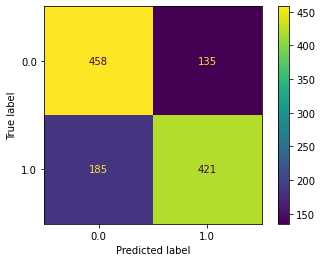

In [57]:
vc_pred = model.predict(X_test)
print(confusion_matrix(y_test,vc_pred))
plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test,vc_pred))

## AdaBoost Classifier

In [58]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [59]:
ada_pred = ada.predict(X_test)
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.57      0.56       593
         1.0       0.57      0.55      0.56       606

    accuracy                           0.56      1199
   macro avg       0.56      0.56      0.56      1199
weighted avg       0.56      0.56      0.56      1199



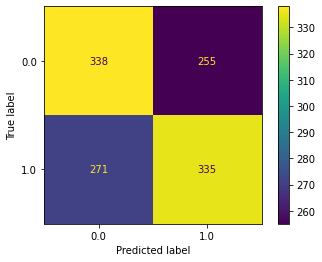

In [60]:
plot_confusion_matrix(ada,X_test,y_test)

## CatBoost Classifier

In [61]:
catboost = CatBoostClassifier(random_state=1)
catboost.fit(X_train,y_train)

Learning rate set to 0.015983
0:	learn: 0.6916604	total: 3.36ms	remaining: 3.36s
1:	learn: 0.6903011	total: 5.76ms	remaining: 2.88s
2:	learn: 0.6887105	total: 7.98ms	remaining: 2.65s
3:	learn: 0.6873483	total: 10.4ms	remaining: 2.58s
4:	learn: 0.6859495	total: 15ms	remaining: 2.98s
5:	learn: 0.6845033	total: 17.7ms	remaining: 2.93s
6:	learn: 0.6829401	total: 19.9ms	remaining: 2.83s
7:	learn: 0.6819249	total: 22.1ms	remaining: 2.75s
8:	learn: 0.6801587	total: 24.4ms	remaining: 2.69s
9:	learn: 0.6788948	total: 26.8ms	remaining: 2.65s
10:	learn: 0.6775457	total: 30.2ms	remaining: 2.71s
11:	learn: 0.6765099	total: 32.9ms	remaining: 2.71s
12:	learn: 0.6753034	total: 35.2ms	remaining: 2.67s
13:	learn: 0.6742562	total: 37.4ms	remaining: 2.63s
14:	learn: 0.6730311	total: 39.6ms	remaining: 2.6s
15:	learn: 0.6719915	total: 41.9ms	remaining: 2.58s
16:	learn: 0.6705756	total: 44.8ms	remaining: 2.59s
17:	learn: 0.6694248	total: 47.2ms	remaining: 2.58s
18:	learn: 0.6679126	total: 49.5ms	remaining: 2

184:	learn: 0.5700071	total: 530ms	remaining: 2.33s
185:	learn: 0.5694134	total: 533ms	remaining: 2.33s
186:	learn: 0.5692536	total: 536ms	remaining: 2.33s
187:	learn: 0.5689246	total: 539ms	remaining: 2.33s
188:	learn: 0.5684055	total: 544ms	remaining: 2.33s
189:	learn: 0.5680545	total: 550ms	remaining: 2.35s
190:	learn: 0.5676803	total: 554ms	remaining: 2.35s
191:	learn: 0.5673408	total: 558ms	remaining: 2.35s
192:	learn: 0.5667684	total: 562ms	remaining: 2.35s
193:	learn: 0.5665016	total: 566ms	remaining: 2.35s
194:	learn: 0.5662726	total: 569ms	remaining: 2.35s
195:	learn: 0.5658841	total: 572ms	remaining: 2.35s
196:	learn: 0.5657282	total: 575ms	remaining: 2.34s
197:	learn: 0.5652784	total: 578ms	remaining: 2.34s
198:	learn: 0.5649489	total: 581ms	remaining: 2.34s
199:	learn: 0.5645080	total: 584ms	remaining: 2.34s
200:	learn: 0.5642003	total: 587ms	remaining: 2.33s
201:	learn: 0.5639034	total: 590ms	remaining: 2.33s
202:	learn: 0.5633554	total: 593ms	remaining: 2.33s
203:	learn: 

353:	learn: 0.5137684	total: 1.06s	remaining: 1.94s
354:	learn: 0.5133193	total: 1.07s	remaining: 1.94s
355:	learn: 0.5130560	total: 1.07s	remaining: 1.94s
356:	learn: 0.5128659	total: 1.07s	remaining: 1.93s
357:	learn: 0.5125399	total: 1.08s	remaining: 1.93s
358:	learn: 0.5121473	total: 1.08s	remaining: 1.93s
359:	learn: 0.5118507	total: 1.08s	remaining: 1.93s
360:	learn: 0.5115646	total: 1.09s	remaining: 1.92s
361:	learn: 0.5110600	total: 1.09s	remaining: 1.92s
362:	learn: 0.5107928	total: 1.09s	remaining: 1.92s
363:	learn: 0.5104030	total: 1.1s	remaining: 1.92s
364:	learn: 0.5100762	total: 1.1s	remaining: 1.91s
365:	learn: 0.5097425	total: 1.1s	remaining: 1.91s
366:	learn: 0.5094070	total: 1.1s	remaining: 1.91s
367:	learn: 0.5090597	total: 1.11s	remaining: 1.9s
368:	learn: 0.5086928	total: 1.11s	remaining: 1.9s
369:	learn: 0.5084046	total: 1.11s	remaining: 1.9s
370:	learn: 0.5080322	total: 1.12s	remaining: 1.9s
371:	learn: 0.5076615	total: 1.12s	remaining: 1.89s
372:	learn: 0.507492

516:	learn: 0.4683263	total: 1.59s	remaining: 1.49s
517:	learn: 0.4681623	total: 1.6s	remaining: 1.49s
518:	learn: 0.4679015	total: 1.6s	remaining: 1.48s
519:	learn: 0.4675702	total: 1.6s	remaining: 1.48s
520:	learn: 0.4673350	total: 1.61s	remaining: 1.48s
521:	learn: 0.4670432	total: 1.61s	remaining: 1.48s
522:	learn: 0.4668739	total: 1.61s	remaining: 1.47s
523:	learn: 0.4666488	total: 1.62s	remaining: 1.47s
524:	learn: 0.4662530	total: 1.62s	remaining: 1.47s
525:	learn: 0.4659268	total: 1.63s	remaining: 1.46s
526:	learn: 0.4657334	total: 1.63s	remaining: 1.46s
527:	learn: 0.4654291	total: 1.63s	remaining: 1.46s
528:	learn: 0.4652053	total: 1.64s	remaining: 1.46s
529:	learn: 0.4648407	total: 1.64s	remaining: 1.45s
530:	learn: 0.4645377	total: 1.64s	remaining: 1.45s
531:	learn: 0.4643671	total: 1.65s	remaining: 1.45s
532:	learn: 0.4641255	total: 1.65s	remaining: 1.44s
533:	learn: 0.4639409	total: 1.65s	remaining: 1.44s
534:	learn: 0.4636802	total: 1.66s	remaining: 1.44s
535:	learn: 0.4

682:	learn: 0.4262167	total: 2.13s	remaining: 987ms
683:	learn: 0.4258749	total: 2.13s	remaining: 984ms
684:	learn: 0.4255978	total: 2.13s	remaining: 981ms
685:	learn: 0.4253086	total: 2.14s	remaining: 978ms
686:	learn: 0.4249284	total: 2.14s	remaining: 975ms
687:	learn: 0.4246976	total: 2.14s	remaining: 972ms
688:	learn: 0.4243825	total: 2.15s	remaining: 969ms
689:	learn: 0.4241732	total: 2.15s	remaining: 965ms
690:	learn: 0.4239372	total: 2.15s	remaining: 962ms
691:	learn: 0.4236520	total: 2.15s	remaining: 959ms
692:	learn: 0.4233254	total: 2.16s	remaining: 956ms
693:	learn: 0.4231824	total: 2.16s	remaining: 953ms
694:	learn: 0.4229519	total: 2.17s	remaining: 950ms
695:	learn: 0.4228282	total: 2.17s	remaining: 947ms
696:	learn: 0.4225664	total: 2.17s	remaining: 944ms
697:	learn: 0.4223314	total: 2.17s	remaining: 941ms
698:	learn: 0.4221049	total: 2.18s	remaining: 938ms
699:	learn: 0.4218195	total: 2.18s	remaining: 934ms
700:	learn: 0.4215386	total: 2.18s	remaining: 931ms
701:	learn: 

887:	learn: 0.3795328	total: 2.84s	remaining: 358ms
888:	learn: 0.3794457	total: 2.84s	remaining: 355ms
889:	learn: 0.3792406	total: 2.84s	remaining: 351ms
890:	learn: 0.3790041	total: 2.85s	remaining: 348ms
891:	learn: 0.3788992	total: 2.85s	remaining: 345ms
892:	learn: 0.3786414	total: 2.85s	remaining: 342ms
893:	learn: 0.3783636	total: 2.86s	remaining: 339ms
894:	learn: 0.3781926	total: 2.86s	remaining: 336ms
895:	learn: 0.3779897	total: 2.86s	remaining: 332ms
896:	learn: 0.3776868	total: 2.87s	remaining: 329ms
897:	learn: 0.3775122	total: 2.87s	remaining: 326ms
898:	learn: 0.3772636	total: 2.87s	remaining: 323ms
899:	learn: 0.3770249	total: 2.88s	remaining: 320ms
900:	learn: 0.3768370	total: 2.88s	remaining: 317ms
901:	learn: 0.3766179	total: 2.88s	remaining: 313ms
902:	learn: 0.3764037	total: 2.89s	remaining: 310ms
903:	learn: 0.3761658	total: 2.89s	remaining: 307ms
904:	learn: 0.3760147	total: 2.9s	remaining: 304ms
905:	learn: 0.3757984	total: 2.9s	remaining: 301ms
906:	learn: 0.

In [62]:
catboost_pred = catboost.predict(X_test)
catboost_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [63]:
print(confusion_matrix(y_test,catboost_pred))
print(classification_report(y_test,catboost_pred))

[[432 161]
 [180 426]]
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72       593
         1.0       0.73      0.70      0.71       606

    accuracy                           0.72      1199
   macro avg       0.72      0.72      0.72      1199
weighted avg       0.72      0.72      0.72      1199



## Extra Trees Classifier

In [125]:
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)

ExtraTreesClassifier()

In [65]:
etc_pred = etc.predict(X_test)
print(classification_report(y_test,etc_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76       593
         1.0       0.78      0.72      0.75       606

    accuracy                           0.75      1199
   macro avg       0.76      0.76      0.75      1199
weighted avg       0.76      0.75      0.75      1199



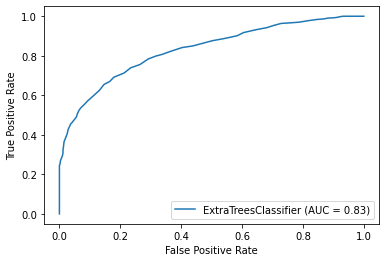

In [117]:
plot_roc_curve(etc,X_test,y_test)

## Light GBM Classifier

In [66]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [67]:
lgbm_pred = lgbm.predict(X_test)
print(classification_report(y_test,lgbm_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68       593
         1.0       0.68      0.67      0.68       606

    accuracy                           0.68      1199
   macro avg       0.68      0.68      0.68      1199
weighted avg       0.68      0.68      0.68      1199



## Histogram Gradient Boosting Classifier

In [68]:
hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [69]:
hgbc_pred = hgbc.predict(X_test)
print(classification_report(y_test,hgbc_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69       593
         1.0       0.69      0.69      0.69       606

    accuracy                           0.69      1199
   macro avg       0.69      0.69      0.69      1199
weighted avg       0.69      0.69      0.69      1199



## Boosting Classifier

In [70]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

In [71]:
bag_pred = bag.predict(X_test)
print(classification_report(y_test,bag_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71       593
         1.0       0.72      0.63      0.67       606

    accuracy                           0.69      1199
   macro avg       0.69      0.69      0.69      1199
weighted avg       0.69      0.69      0.69      1199



## Model Performance Analysis

In [72]:
print('Accuracy Score of Logistic Regression:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')
print('Accuracy Score of SGD Classifier:',str(np.round(accuracy_score(y_test,sgd_pred)*100,2)) + '%')
print('Accuracy Score of Passive Aggressive Classifier:',str(np.round(accuracy_score(y_test,pac_pred)*100,2)) + '%')
print('Accuracy Score of Ridge Classifier:',str(np.round(accuracy_score(y_test,ridge_pred)*100,2)) + '%')
print('Accuracy Score of Gaussian Naive Bayes:',str(np.round(accuracy_score(y_test,gnb_pred)*100,2)) + '%')
print('Accuracy Score of Bernoulli Naive Bayes:',str(np.round(accuracy_score(y_test,bnb_pred)*100,2)) + '%')
print('Accuracy Score of K Neighbors Classifier:',str(np.round(accuracy_score(y_test,knc_pred)*100,2)) + '%')
print('Accuracy Score of Support Vector Classifier:',str(np.round(accuracy_score(y_test,svc_pred)*100,2)) + '%')
print('Accuracy Score of Decision Tree Classifier:',str(np.round(accuracy_score(y_test,dtree_pred)*100,2)) + '%')
print('Accuracy Score of Random Forest Classifier:',str(np.round(accuracy_score(y_test,rfc_pred)*100,2)) + '%')
print('Accuracy Score of XG Boost Classifier:',str(np.round(accuracy_score(y_test,xgb_pred)*100,2)) + '%')
print('Accuracy Score of Gradient Boosting Classifier:',str(np.round(accuracy_score(y_test,gbc_pred)*100,2)) + '%')
print('Accuracy Score of Voting Classifier:',str(np.round(accuracy_score(y_test,vc_pred)*100,2)) + '%')
print('Accuracy Score of CatBoost Classifier:',str(np.round(accuracy_score(y_test,catboost_pred)*100,2)) + '%')
print('Accuracy Score of AdaBoost Classifier:',str(np.round(accuracy_score(y_test,ada_pred)*100,2)) + '%')
print('Accuracy Score of Extra Trees Classifier:',str(np.round(accuracy_score(y_test,etc_pred)*100,2)) + '%')
print('Accuracy Score of LGBM Classifier:',str(np.round(accuracy_score(y_test,lgbm_pred)*100,2)) + '%')
print('Accuracy Score of Hist Gradient Boosting Classifier:',str(np.round(accuracy_score(y_test,hgbc_pred)*100,2)) + '%')
print('Accuracy Score of Bagging Classifier:',str(np.round(accuracy_score(y_test,bag_pred)*100,2)) + '%')

Accuracy Score of Logistic Regression: 52.79%
Accuracy Score of SGD Classifier: 50.79%
Accuracy Score of Passive Aggressive Classifier: 50.88%
Accuracy Score of Ridge Classifier: 52.79%
Accuracy Score of Gaussian Naive Bayes: 56.38%
Accuracy Score of Bernoulli Naive Bayes: 50.88%
Accuracy Score of K Neighbors Classifier: 67.06%
Accuracy Score of Support Vector Classifier: 67.56%
Accuracy Score of Decision Tree Classifier: 61.38%
Accuracy Score of Random Forest Classifier: 75.31%
Accuracy Score of XG Boost Classifier: 67.39%
Accuracy Score of Gradient Boosting Classifier: 64.55%
Accuracy Score of Voting Classifier: 73.31%
Accuracy Score of CatBoost Classifier: 71.56%
Accuracy Score of AdaBoost Classifier: 56.13%
Accuracy Score of Extra Trees Classifier: 75.48%
Accuracy Score of LGBM Classifier: 67.72%
Accuracy Score of Hist Gradient Boosting Classifier: 68.72%
Accuracy Score of Bagging Classifier: 69.14%


Extra Trees Classifier produced the best performance among all models with the highest prediction accuracy of almost 75.5%.

## Hyperparameter Tuning using Cross Validation

In [75]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

#KNN
para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'], 'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv

#Random Forest
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#SVC
params_svc = {'C': [.1,1,10,100,1000,10000], 'gamma': [.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid_svc = GridSearchCV(svc, param_grid = params_svc, cv=5)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

In [76]:
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_svc.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for SVC:", grid_svc.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}
Best parameters for SVC: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best parameters for XGBoost: {'n_estimators': 100, 'learning_rate': 0.8}


In [77]:
models = [('KNN', knn), ('DT', dt), ('RF', rf), 
          ('SVC', svc), ('XGBoost', xgb)]

for model_name, model in models:
 
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(model_name,':',str(np.round(accuracy*100,2)) + '%')

KNN : 66.56%
DT : 61.63%
RF : 74.23%
SVC : 67.56%
XGBoost : 67.39%


## Saving the model for future use

In [126]:
joblib.dump(etc,'model.pkl')

['model.pkl']

In [127]:
model = joblib.load('model.pkl')
model

ExtraTreesClassifier()